In [1]:
!pip install klib

In [2]:
!pip install sweetviz

In [3]:
!pip install pandas_profiling

In [4]:
!pip install --upgrade numba

  Using cached numba-0.59.1-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached llvmlite-0.42.0-cp310-cp310-win_amd64.whl (28.1 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [5]:
!pip install --upgrade pandas-profiling

In [6]:
!pip install graphviz

In [7]:
import pandas as pd
import numpy as np
import klib
import sweetviz
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import *
from sklearn.model_selection import train_test_split
from platform import python_version

from sklearn.tree import export_graphviz
import graphviz

%precision 2

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 120
pd.options.display.float_format='{:,.2g}'.format
pd.options.display.precision = 2

np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=5, floatmode='unique')

sns.set_style("white")

StartBold = "\033[1m"
EndBold = "\033[0m"

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)
#print(pp.__name__, pp.__version__)
print(sklearn.__name__, sklearn.__version__)
print(sweetviz.__name__, sweetviz.__version__)

C:\Users\vanam\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


python 3.10.9
numpy 1.23.5
pandas 2.2.2
klib 1.1.2
sklearn 1.3.2
sweetviz 2.3.1


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.kernel_approximation import RBFSampler

from sklearn.svm import SVC

from sklearn import metrics

In [9]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']


In [10]:
# Global Parameters

random_state = 2021
n_jobs = 4

# Define Dictionary Mappers

In [11]:
week_days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
is_weekday = {0:'Weekend',1:'Weekday'}

# Read Data

In [12]:
file_crash_df = r'C:\Users\vanam\Downloads\crash_df.csv'

crash_df = pd.read_csv(file_crash_df)

crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814109 entries, 0 to 814108
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               814109 non-null  int64  
 1   crash_date               814109 non-null  object 
 2   crash_year               814109 non-null  int64  
 3   crash_month              814109 non-null  int64  
 4   crash_day_of_week        814109 non-null  int64  
 5   crash_hour               814109 non-null  int64  
 6   crash_time_of_day        814109 non-null  object 
 7   latitude                 814109 non-null  float64
 8   longitude                814109 non-null  float64
 9   beat_of_occurrence       814109 non-null  int64  
 10  address                  814109 non-null  object 
 11  street_no                814109 non-null  int64  
 12  street_direction         814108 non-null  object 
 13  street_name              814109 non-null  object 
 14  post

# Engineer New Features

In [13]:
crash_df['is_weekday'] = crash_df.crash_day_of_week.map(lambda x: 0 if x in [1,7] else 1)


# Select Features of interest

In [14]:
features_names = [
#    'crash_date',
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'crash_time_of_day', # New
    'is_weekday', #New
    'latitude',
    'longitude',
#    'beat_of_occurrence', # Should be considered as categorical, don't scale.
#    'address',
#    'street_no',
#    'street_direction',
#    'street_name',
    'posted_speed_limit',
    'traffic_control_device',
    'device_condition',
    'weather_condition',
    'lighting_condition',
    'trafficway_type',
    'alignment',
    'roadway_surface_cond',
    'road_defect',
    'first_crash_type',
    'prim_contributory_cause',
    'sec_contributory_cause',
    'num_units',
#    'intersection_related_i',
#    'not_right_of_way_i',
#    'hit_and_run_i',
]

target_names = [
    'has_injuries',  # New
#    'has_fatal',  # New
#    'crash_type',
#    'damage',
#    'injuries_total',
#    'injuries_fatal',
#    'injuries_incapacitating',
#    'inj_non_incap',
#    'inj_report_not_evdnt',
#    'injuries_no_indication',
#    'most_severe_injury',
]

all_columns = features_names + target_names
all_columns

['crash_year',
 'crash_month',
 'crash_time_of_day',
 'is_weekday',
 'latitude',
 'longitude',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'first_crash_type',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'num_units',
 'has_injuries']

In [15]:
#crash_df = crash_df[(crash_df.crash_year>=2015) & (crash_df.crash_year<=2023)]
crash_all_df = crash_df[(crash_df.crash_year>=2015) & (crash_df.crash_year<=2023)]
crash_all_df = crash_all_df[all_columns[1:]] # drop year column
crash_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788429 entries, 0 to 814108
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_month              788429 non-null  int64  
 1   crash_time_of_day        788429 non-null  object 
 2   is_weekday               788429 non-null  int64  
 3   latitude                 788429 non-null  float64
 4   longitude                788429 non-null  float64
 5   posted_speed_limit       788429 non-null  int64  
 6   traffic_control_device   788429 non-null  object 
 7   device_condition         788429 non-null  object 
 8   weather_condition        788429 non-null  object 
 9   lighting_condition       788429 non-null  object 
 10  trafficway_type          788429 non-null  object 
 11  alignment                788429 non-null  object 
 12  roadway_surface_cond     788429 non-null  object 
 13  road_defect              788429 non-null  object 
 14  first_cra

# Determine features / target

In [16]:
features_all = crash_all_df[features_names[1:]].copy() # skip year column
target = crash_all_df[target_names].has_injuries.copy()

features_all.shape, target.shape

((788429, 18), (788429,))

# Create Dummies

In [17]:
features_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788429 entries, 0 to 814108
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_month              788429 non-null  int64  
 1   crash_time_of_day        788429 non-null  object 
 2   is_weekday               788429 non-null  int64  
 3   latitude                 788429 non-null  float64
 4   longitude                788429 non-null  float64
 5   posted_speed_limit       788429 non-null  int64  
 6   traffic_control_device   788429 non-null  object 
 7   device_condition         788429 non-null  object 
 8   weather_condition        788429 non-null  object 
 9   lighting_condition       788429 non-null  object 
 10  trafficway_type          788429 non-null  object 
 11  alignment                788429 non-null  object 
 12  roadway_surface_cond     788429 non-null  object 
 13  road_defect              788429 non-null  object 
 14  first_cra

In [18]:
features_all_dm = pd.get_dummies(features_all)

In [19]:
# Split data into Features X and Target y
X = features_all_dm
y = target
print('X and y shapes:')
print(X.shape,y.shape,'\n')
print('Target Ratio:')
print(y.value_counts(normalize=True, dropna=False),'\n')

X and y shapes:
(788429, 193) (788429,) 

Target Ratio:
has_injuries
0   0.86
1   0.14
Name: proportion, dtype: float64 



In [20]:
X

,crash_month,is_weekday,latitude,longitude,posted_speed_limit,num_units,crash_time_of_day_evening,crash_time_of_day_mid_day,crash_time_of_day_morning,crash_time_of_day_overnight,traffic_control_device_BICYCLE CROSSING SIGN,traffic_control_device_DELINEATORS,traffic_control_device_FLASHING CONTROL SIGNAL,traffic_control_device_LANE USE MARKING,traffic_control_device_NO CONTROLS,traffic_control_device_NO PASSING,traffic_control_device_OTHER,traffic_control_device_OTHER RAILROAD CROSSING,traffic_control_device_OTHER REG. SIGN,traffic_control_device_OTHER WARNING SIGN,traffic_control_device_PEDESTRIAN CROSSING SIGN,traffic_control_device_POLICE/FLAGMAN,traffic_control_device_RAILROAD CROSSING GATE,traffic_control_device_RR CROSSING SIGN,traffic_control_device_SCHOOL ZONE,traffic_control_device_STOP SIGN/FLASHER,traffic_control_device_TRAFFIC SIGNAL,traffic_control_device_UNKNOWN,traffic_control_device_YIELD,device_condition_FUNCTIONING IMPROPERLY,device_condition_FUNCTIONING PROPERLY,device_condition_MISSING,device_condition_NO CONTROLS,device_condition_NOT FUNCTIONING,device_condition_OTHER,device_condition_UNKNOWN,device_condition_WORN REFLECTIVE MATERIAL,"weather_condition_BLOWING SAND, SOIL, DIRT",weather_condition_BLOWING SNOW,weather_condition_CLEAR,weather_condition_CLOUDY/OVERCAST,weather_condition_FOG/SMOKE/HAZE,weather_condition_FREEZING RAIN/DRIZZLE,weather_condition_OTHER,weather_condition_RAIN,weather_condition_SEVERE CROSS WIND GATE,weather_condition_SLEET/HAIL,weather_condition_SNOW,weather_condition_UNKNOWN,lighting_condition_DARKNESS,...,prim_contributory_cause_PHYSICAL CONDITION OF DRIVER,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER,sec_contributory_cause_ANIMAL,sec_contributory_cause_BICYCLE ADVANCING LEGALLY ON RED LIGHT,sec_contributory_cause_CELL PHONE USE OTHER THAN TEXTING,sec_contributory_cause_DISREGARDING OTHER TRAFFIC SIGNS,sec_contributory_cause_DISREGARDING ROAD MARKINGS,sec_contributory_cause_DISREGARDING STOP SIGN,sec_contributory_cause_DISREGARDING TRAFFIC SIGNALS,sec_contributory_cause_DISREGARDING YIELD SIGN,sec_contributory_cause_DISTRACTION - FROM INSIDE VEHICLE,sec_contributory_cause_DISTRACTION - FROM OUTSIDE VEHICLE,"sec_contributory_cause_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",sec_contributory_cause_DRIVING ON WRONG SIDE/WRONG WAY,sec_contributory_cause_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,sec_contributory_cause_EQUIPMENT - VEHICLE CONDITION,"sec_contributory_cause_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",sec_contributory_cause_EXCEEDING AUTHORIZED SPEED LIMIT,sec_contributory_cause_EXCEEDING SAFE SPEED FOR CONDITIONS,sec_contributory_cause_FAILING TO REDUCE SPEED TO AVOID CRASH,sec_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY,sec_contributory_cause_FOLLOWING TOO CLOSELY,sec_contributory_cause_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),sec_contributory_cause_IMPROPER BACKING,sec_contributory_cause_IMPROPER LANE USAGE,sec_contributory_cause_IMPROPER OVERTAKING/PASSING,sec_contributory_cause_IMPROPER TURNING/NO SIGNAL,sec_contributory_cause_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,sec_contributory_cause_NOT APPLICABLE,sec_contributory_cause_OBSTRUCTED CROSSWALKS,"sec_contributory_cause_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",sec_contributory_cause_PASSING STOPPED SCHOOL BUS,sec_contributory_cause_PHYSICAL CONDITION OF DRIVER,sec_contributory_cause_RELATED TO BUS STOP,sec_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,sec_contributory_cause_ROAD ENGINEERING/SURF

In [21]:
# Split data into Train and Test
# We stratify to make sure target representation is kept in the new datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
#                                                    stratify=y,
                                                    random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((630743, 193), (157686, 193), (630743,), (157686,))

In [22]:
print('Training Data:')
print('--------------')
print('X and y shapes:')
print(X_train.shape,y_train.shape,'\n')
print('Target Ratio:')
print(y_train.value_counts(normalize=True, dropna=False),'\n')

Training Data:
--------------
X and y shapes:
(630743, 193) (630743,) 

Target Ratio:
has_injuries
0   0.86
1   0.14
Name: proportion, dtype: float64 



In [23]:
print('Testing Data:')
print('-------------')
print('X and y shapes:')
print(X_test.shape,y_test.shape,'\n')
print('Target Ratio:')
print(y_test.value_counts(normalize=True, dropna=False),'\n')

Testing Data:
-------------
X and y shapes:
(157686, 193) (157686,) 

Target Ratio:
has_injuries
0   0.86
1   0.14
Name: proportion, dtype: float64 



It's visible that we have an imbalanced target that we need to consider during our evaluations.

# Resampling (Obsolete)

**NOTE: Decided to utilize class_weight='balanced' in models for better management**

Resampling to compensate the target class that has low representation.

In [24]:
#'''
ros = RandomOverSampler(random_state=random_state)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print('Testing Data:')
print('-------------')
print('X and y shapes:')
print(X_train_resampled.shape,y_train_resampled.shape,'\n')
print('Target Ratio:')
print(y_train_resampled.value_counts(normalize=True, dropna=False),'\n')
#''';

Testing Data:
-------------
X and y shapes:
(1088332, 193) (1088332,) 

Target Ratio:
has_injuries
1   0.5
0   0.5
Name: proportion, dtype: float64 



# Helper Functions

In [25]:
def get_GS_cv_results(gs):
    _cv_results_ = gs.cv_results_
    _scorer_keys = gs.scorer_.keys()

    df_gs_scores = pd.DataFrame()

    for k in _cv_results_.keys():
        if k.startswith('param_'):
            param_key = ('param',k.split('_',1)[1])
            param_values = _cv_results_[k]
            df_gs_scores = pd.concat([df_gs_scores,pd.DataFrame({param_key:param_values})], axis=1)

        elif k.startswith('mean_train') or k.startswith('mean_test'):
            score_key = (k.split('_',2)[2],k.split('_',2)[1])
            score_results = _cv_results_[k]
            df_gs_scores = pd.concat([df_gs_scores,pd.DataFrame({score_key:score_results})], axis=1)

    return df_gs_scores

def plot_grid_search_scores_grid(gs, display_plots=False):
    _cv_results_ = gs.cv_results_
    _scorer_keys = gs.scorer_.keys()
    _param_keys = list(_cv_results_['params'][0].keys())
    df_gs_scores = get_GS_cv_results(gs)
    
    display(df_gs_scores)
    
    if(display_plots):
        if len(_param_keys) > 1:
            for _score in _scorer_keys:
                dd = df_gs_scores[['param',_score]]
                dd.columns = dd.columns.droplevel(0)
                ddm = dd.melt(id_vars=_param_keys[:2],value_vars=['train','test'],var_name='dataset',value_name=_score)
                g = sns.FacetGrid(ddm,col=_param_keys[0],height=3)
                g.map_dataframe(sns.lineplot,_param_keys[1],_score,'dataset')
                g.add_legend()
        else:
            for _score in _scorer_keys:
                dd = df_gs_scores[['param',_score]]
                dd.columns = dd.columns.droplevel(0)
                ddm = dd.melt(id_vars=_param_keys,value_vars=['train','test'],var_name='dataset',value_name=_score)
                g = sns.FacetGrid(ddm, height=3)
                g.map_dataframe(sns.lineplot,_param_keys[0],_score,'dataset')
                g.add_legend()

def plot_grid_search_results(gs, plot_scoring='r2'):
    _cv_results_ = gs.cv_results_
    _scorer_keys = gs.scorer_.keys()
    
    print(f'{StartBold}Estimator:{EndBold}')
    print(gs.best_estimator_)
    print()
    print(f'{StartBold}Best Result (Suggested):{EndBold}')
    print(f'{StartBold}\t{"":20} {"train":>6} {"valdn":>6}{EndBold}')
    for _score in _scorer_keys:
        print('\t{2:>20} {0:>6.2f} {1:>6.2f}'.format(_cv_results_['mean_train_' + _score][gs.best_index_],
                                             _cv_results_['mean_test_' + _score][gs.best_index_],
                                             _score))
    print()
    print(f'{StartBold}Params:{EndBold}')
    print('\t{}'.format(gs.best_params_))
    print()
    
 
    scoring_label = plot_scoring
    not_negative = 1
    if plot_scoring.startswith('neg_'):
        scoring_label = plot_scoring[4:]
        not_negative = -1
    df = pd.DataFrame({
        'params': _cv_results_['params'],
        'mean_train_' + plot_scoring: _cv_results_['mean_train_' + plot_scoring] * not_negative,
        'mean_test_' + plot_scoring: _cv_results_['mean_test_' + plot_scoring] * not_negative
    })
    fig, ax = plt.subplots()
    df.plot('params',['mean_train_' + plot_scoring,'mean_test_' + plot_scoring], 'line', ax=ax)
    ax.axvline(gs.best_index_,0,1, color='r', linestyle='--')
    plt.grid(axis='both',c='lightgrey',ls=':')
    plt.xticks(ticks=range(df.params.count()), labels=df.params)
    plt.tick_params(axis='x', rotation=90)
    plt.ylabel(scoring_label)
    plt.legend(['train','valdn'])
    plt.show()
    
    #_ = gs
    #df_ = pd.DataFrame(_.cv_results_).filter(regex='(?:mean_test)|(?:params)')
    #df_.insert(0,'classifier',_.best_estimator_.named_steps.classifier.__class__.__name__)
    #d_result = {_.best_estimator_.named_steps.classifier:dict(df_.iloc[_.best_index_])}
    #d_result
    plot_grid_search_scores_grid(gs)

    if("beep" in globals()): beep(True)
        
def score_classification_model(fitted_model, X, y_true, return_score=False):
    p = fitted_model.predict(X)
    
    accuracy = metrics.accuracy_score(y_true, p)
    f1 = metrics.f1_score(y_true, p)
    recall = metrics.recall_score(y_true, p)
    precision = metrics.precision_score(y_true, p)
    balanced_accuracy = metrics.balanced_accuracy_score(y_true, p)
    roc = metrics.roc_auc_score(y_true, p)

    print('accuracy score:          {:>5.2f}'.format(accuracy))
    print('f1 score:                {:>5.2f}'.format(f1))
    print('recall score:            {:>5.2f}'.format(recall))
    print('precision score:         {:>5.2f}'.format(precision))
    print('balanced_accuracy score: {:>5.2f}'.format(balanced_accuracy))
    print('roc_auc score:           {:>5.2f}'.format(roc))

    #print(metrics.classification_report(y_true,p))
    cm = confusion_matrix(y_true, p)
    print(metrics.classification_report(y_true, p))

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
          
    #print(metrics.classification_report(y_true,p, sample_weight=compute_sample_weight('balanced',y_true)))
    #metrics.plot_confusion_matrix(fitted_model,X, y_true, sample_weight=compute_sample_weight('balanced',y_true))

    if((type(return_score) is str) or return_score):
        if(type(fitted_model) == GridSearchCV):
            model = fitted_model.best_estimator_
            if(type(model) == Pipeline):
                model = fitted_model.best_estimator_.named_steps.classifier
        else:
            model = fitted_model
        key = str(model).replace('\n','').replace('\t','') + ( (' - ' + return_score) if type(return_score) == str else '')
        results_dict = {key : {}}
        results_dict[key]['Estimator'] = model.__class__.__name__
        results_dict[key]['TAG'] = return_score if type(return_score) == str else '-'
        results_dict[key]['Accuracy'] = accuracy
        results_dict[key]['F1'] = f1
        results_dict[key]['Recall'] = recall
        results_dict[key]['Precision'] = precision
        results_dict[key]['Balanced_Accuracy'] = balanced_accuracy
        results_dict[key]['ROC_AUC'] = roc
        return(results_dict)
    
def plot_coefficients(coef, feature_names, top_n=0):
    _ = pd.DataFrame({'features':feature_names,'coef':coef}).sort_values('coef',key=lambda x: abs(x),ascending=False)
    if top_n > 0:
        _ = _.iloc[:top_n,:]
    n_features = _.shape[0]
    #plt.subplots(figsize=(10,20))
    plt.barh(range(n_features), _['coef'], align='center')
    plt.yticks(np.arange(n_features), _['features'])
    plt.xlabel('Value')
    plt.ylabel('Feature')
    plt.ylim(n_features,-1)
    plt.show()


# Models

## Common GridSearch Params

In [26]:
# Common Grid Search Parameters

grid_search_defaults = {
    'cv': 3,
    'scoring': ['f1', 'recall', 'precision', 'balanced_accuracy', 'accuracy', 'roc_auc'],
    'refit': 'f1',
    'return_train_score': True,
    'error_score': 0,
    'verbose': 3,
    'n_jobs': n_jobs,
}

# [**RUN ALL ABOVE BEFORE ANY MODEL**]

## Random Forest

Fitting 3 folds for each of 27 candidates, totalling 81 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight={1: 5}, max_depth=32,
                                        max_leaf_nodes=64, n_estimators=400,
                                        n_jobs=-1, random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.45   0.45
	              recall   0.58   0.58
	           precision   0.37   0.37
	   balanced_accuracy   0.71   0.71
	            accuracy   0.81   0.81
	             roc_auc   0.81   0.81

Params:
	{'classifier__class_weight': {1: 5}, 'classifier__max_depth': 32, 'classifier__max_leaf_nodes': 64}



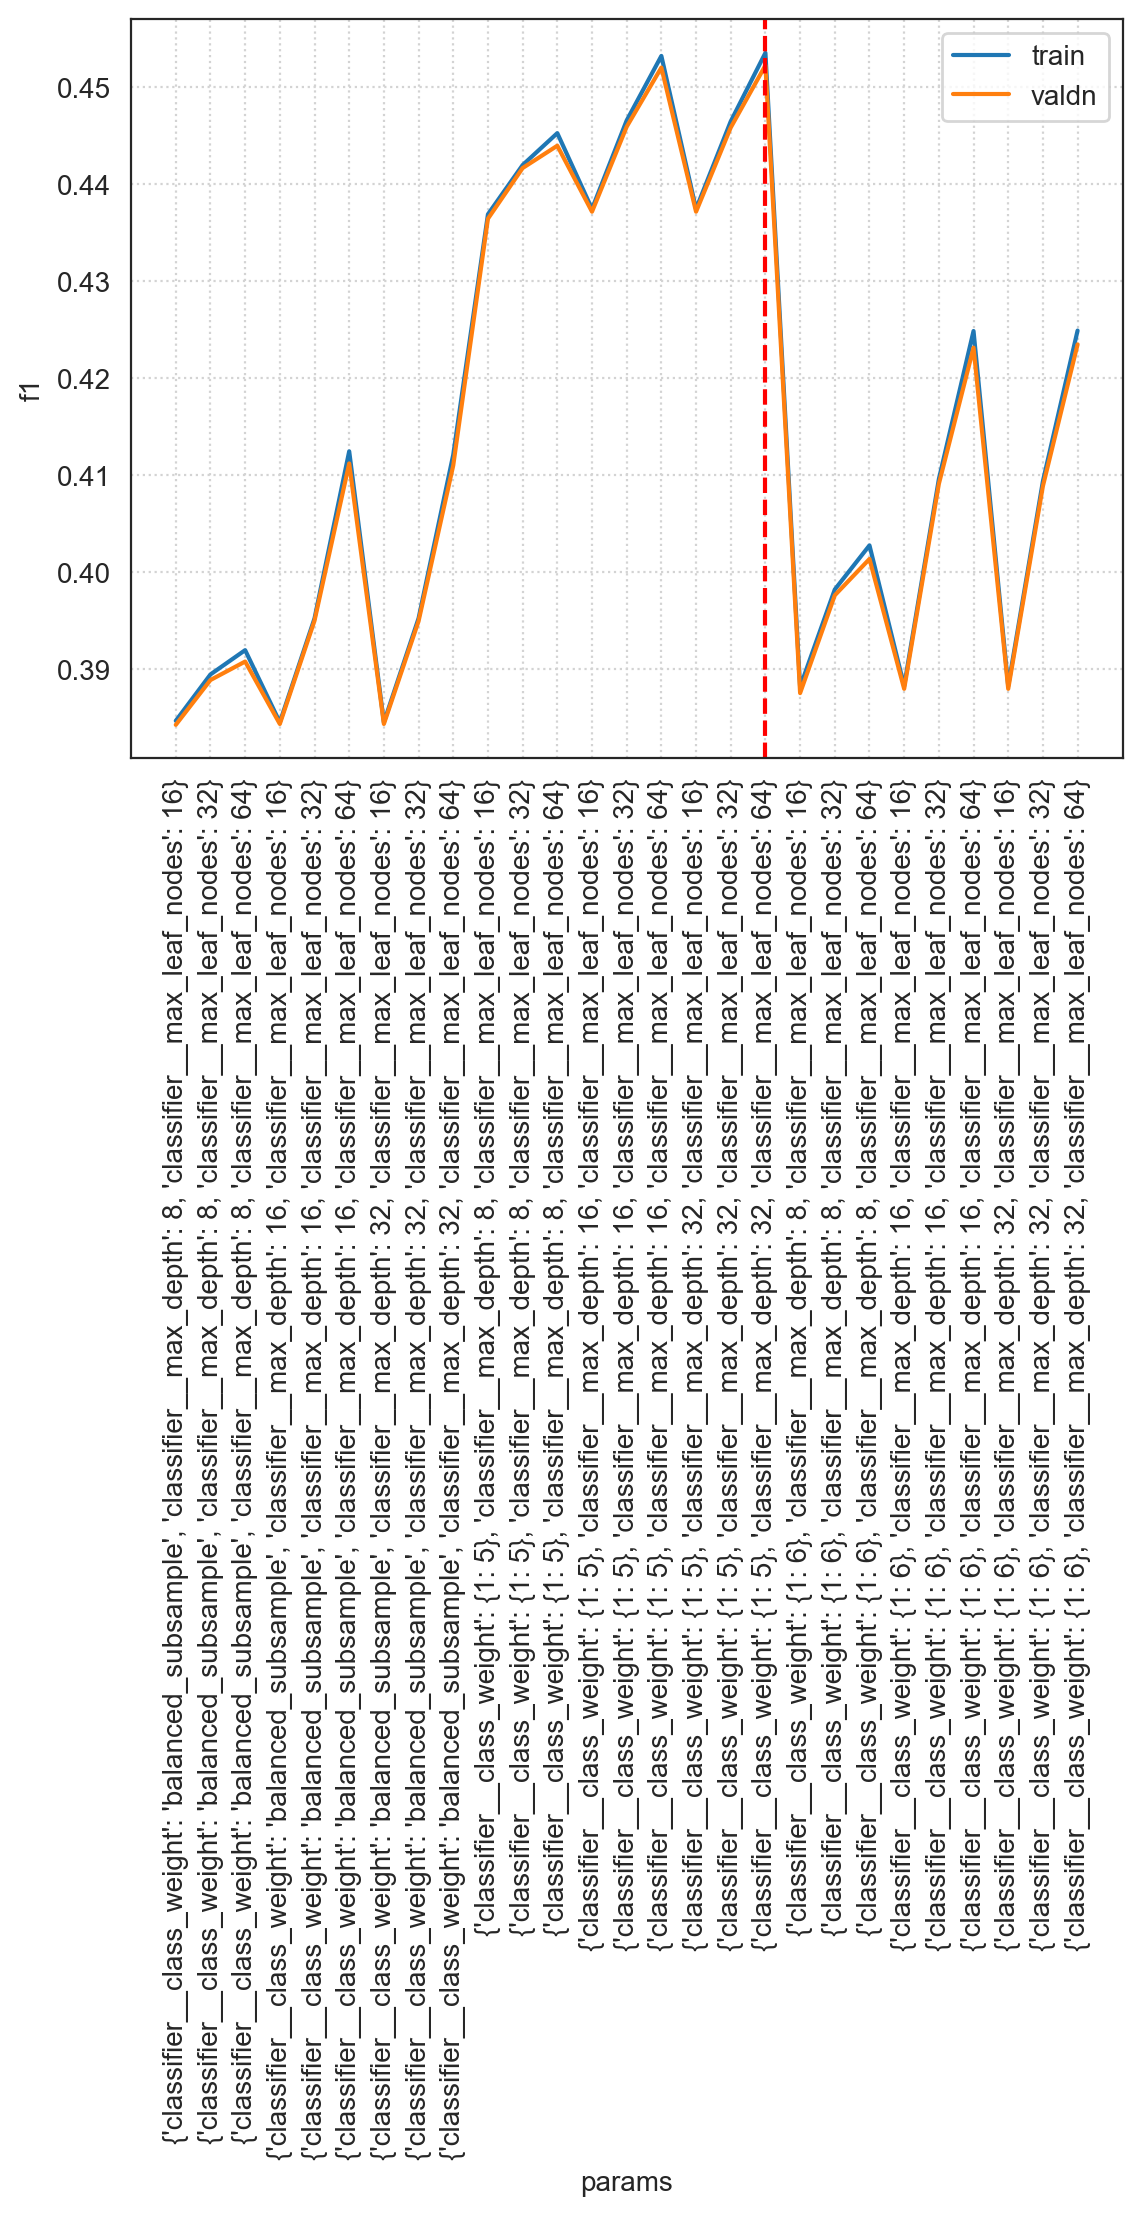

param                                                    f1       recall       precision        \
   classifier__class_weight classifier__max_depth classifier__max_leaf_nodes test train   test train      test train   
0        balanced_subsample                     8                         16 0.38  0.38   0.71  0.72      0.26  0.26   
1        balanced_subsample                     8                         32 0.39  0.39   0.72  0.72      0.27  0.27   
2        balanced_subsample                     8                         64 0.39  0.39   0.72  0.73      0.27  0.27   
3        balanced_subsample                    16                         16 0.38  0.38   0.73  0.73      0.26  0.26   
4        balanced_subsample                    16                         32  0.4   0.4   0.74  0.74      0.27  0.27   
5        balanced_subsample                    16                         64 0.41  0.41   0.73  0.73      0.29  0.29   
6        balanced_subsample                    32                         16 0.38  0.38   0.73  0.73      0.26  0.26   
7        balanced_subsample                    32                         32 0.39   0.4   0.74  0.74      0.27  0.27   
8        balanced_subsample                    32                         64 0.41  0.41   0.73  0.73      0.29  0.29   
9                    {1: 5}                     8                         16 0.44  0.44   0.52  0.52      0.37  0.37   
10                   {1: 5}                     8                         32 0.44  0.44   0.53  0.53      0.38  0.38   
11                   {1: 5}                     8                         64 0.44  0.45   0.53  0.54      0.38  0.38   
12                   {1: 5}                    16                         16 0.44  0.44   0.54  0.54      0.37  0.37   
13                   {1: 5}                    16                         32 0.45  0.45   0.56  0.56      0.37  0.37   
14                   {1: 5}                    16                         64 0.45  0.45   0.58  0.58      0.37  0.37   
15                   {1: 5}                    32                         16 0.44  0.44   0.54  0.54      0.37  0.37   
16                   {1: 5}                    32                         32 0.45  0.45   0.56  0.56      0.37  0.37   
17                   {1: 5}                    32                         64 0.45  0.45   0.58  0.58      0.37  0.37   
18                   {1: 6}                     8                         16 0.39  0.39   0.68  0.68      0.27  0.27   
19                   {1: 6}                     8                         32  0.4   0.4   0.68  0.68      0.28  0.28   
20                   {1: 6}                     8                         64  0.4   0.4   0.68  0.68      0.29  0.29   
21                   {1: 6}                    16                         16 0.39  0.39   0.69   0.7      0.27  0.27   
22                   {1: 6}                    16                         32 0.41  0.41    0.7   0.7      0.29  0.29   
23                   {1: 6}                    16                         64 0.42  0.42   0.69  0.69       0.3  0.31   
24                   {1: 6}                    32                         16 0.39  0.39   0.69   0.7      0.27  0.27   
25                   {1: 6}                    32                         32 0.41  0.41    0.7   0.7      0.29  0.29   
26                   {1: 6}                    32                         64 0.42  0.42    0.7   0.7       0.3  0.31   

   balanced_accuracy       accuracy       roc_auc        
                test train     test train    test train  
0                0.7   0.7     0.69  0.69    0.79  0.79  
1                0.7   0.7     0.69  0.69     0.8   0.8  
2                0.7  0.71     0.69  0.69     0.8   0.8  
3                0.7   0.7     0.68  0.68    0.79  0.79  
4               0.71  0.71     0.69  0.69     0.8   0.8  
5               0.72  0.72     0.71  0.71    0.81  0.81  
6                0.7   0.7     0.68  0.68    0.79  0.79  
7               0.7



Test_Set Results:
accuracy score:           0.81
f1 score:                 0.45
recall score:             0.59
precision score:          0.37
balanced_accuracy score:  0.71
roc_auc score:            0.71
              precision    recall  f1-score   support

           0       0.93      0.84      0.88    135913
           1       0.37      0.59      0.45     21773

    accuracy                           0.81    157686
   macro avg       0.65      0.71      0.67    157686
weighted avg       0.85      0.81      0.82    157686



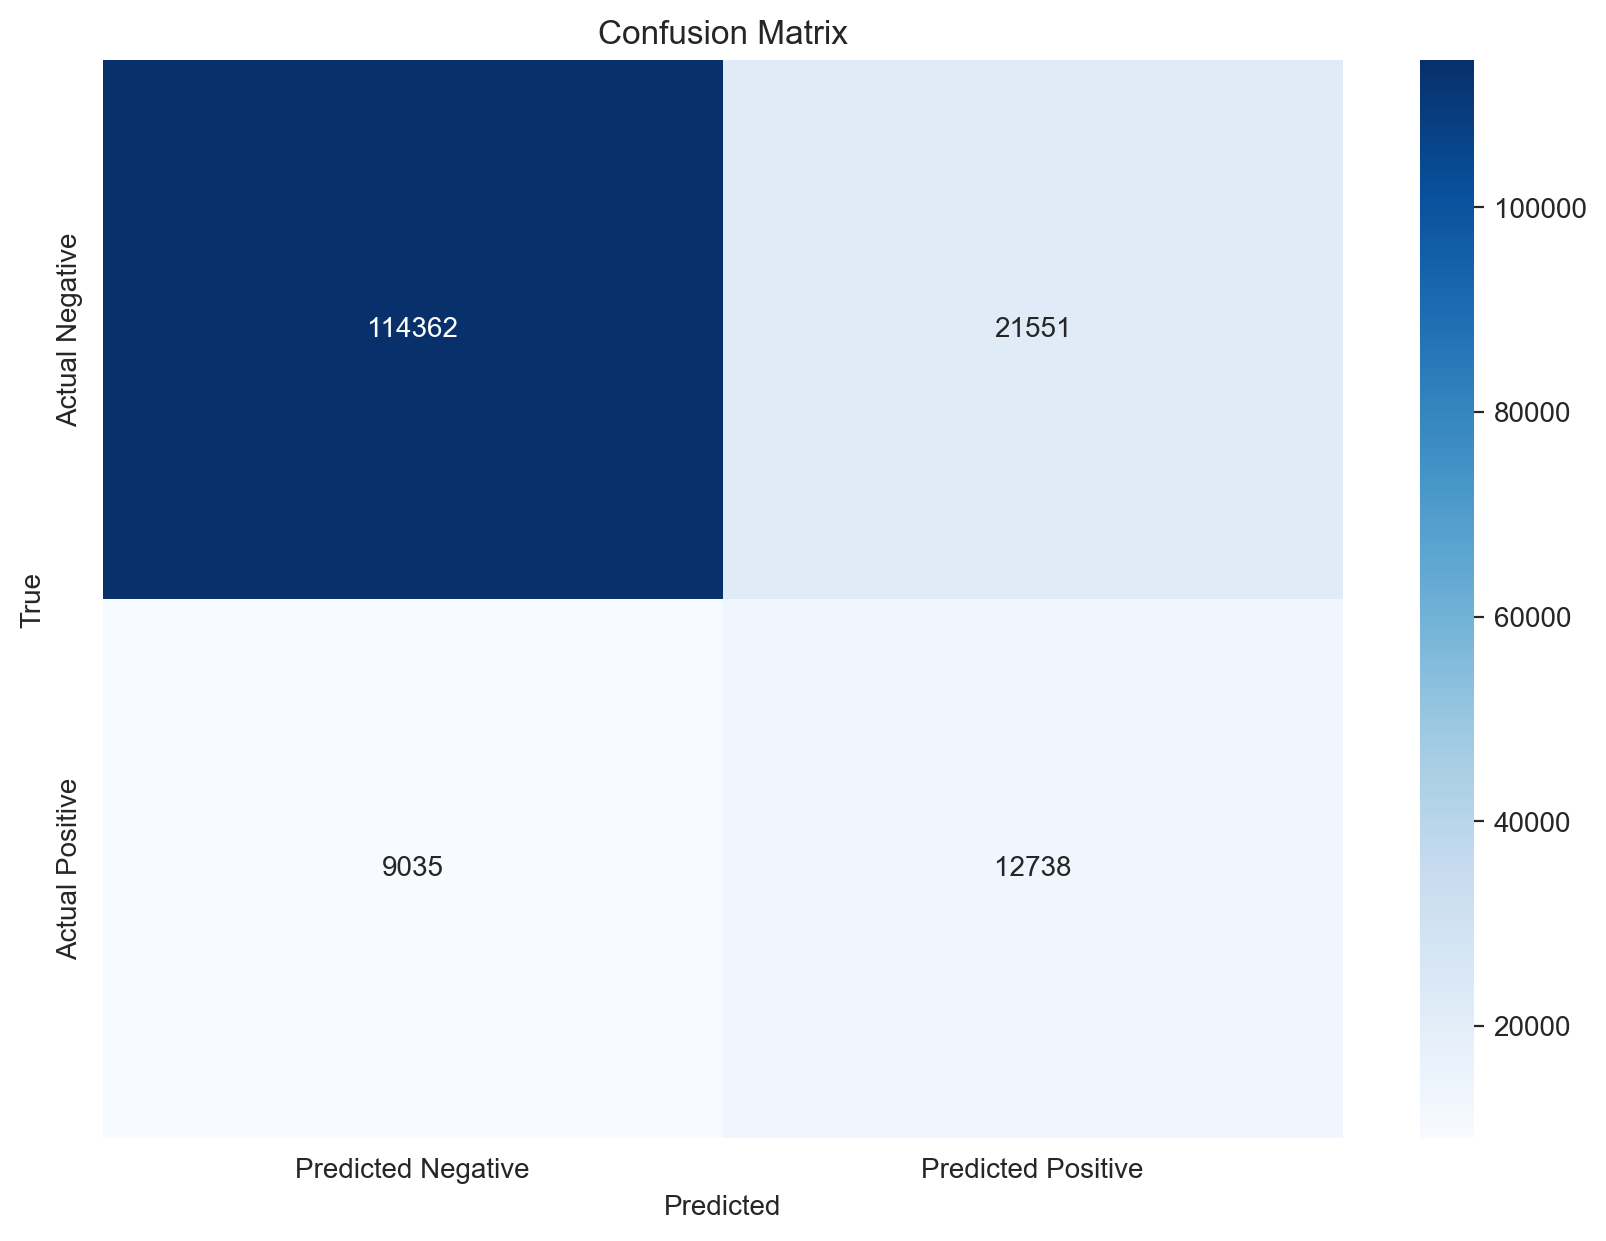

In [27]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=random_state))
    ]
)

params = {
    'classifier__class_weight': ['balanced_subsample',{1:5},{1:6}],
#    'classifier__n_estimators': [300,400,500],
    'classifier__max_depth': [8,16,32],
#    'classifier__max_features': [.1,.3,.5],
#    'classifier__min_samples_split': [.01,.05,.1,.3,.5],
#    'classifier__min_samples_leaf': [8,16,32],
    'classifier__max_leaf_nodes': [16,32,64],
}
gs_rf = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_rf.fit(
    X_train,
    y_train
)
print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_rf, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_rf, X_test, y_test)



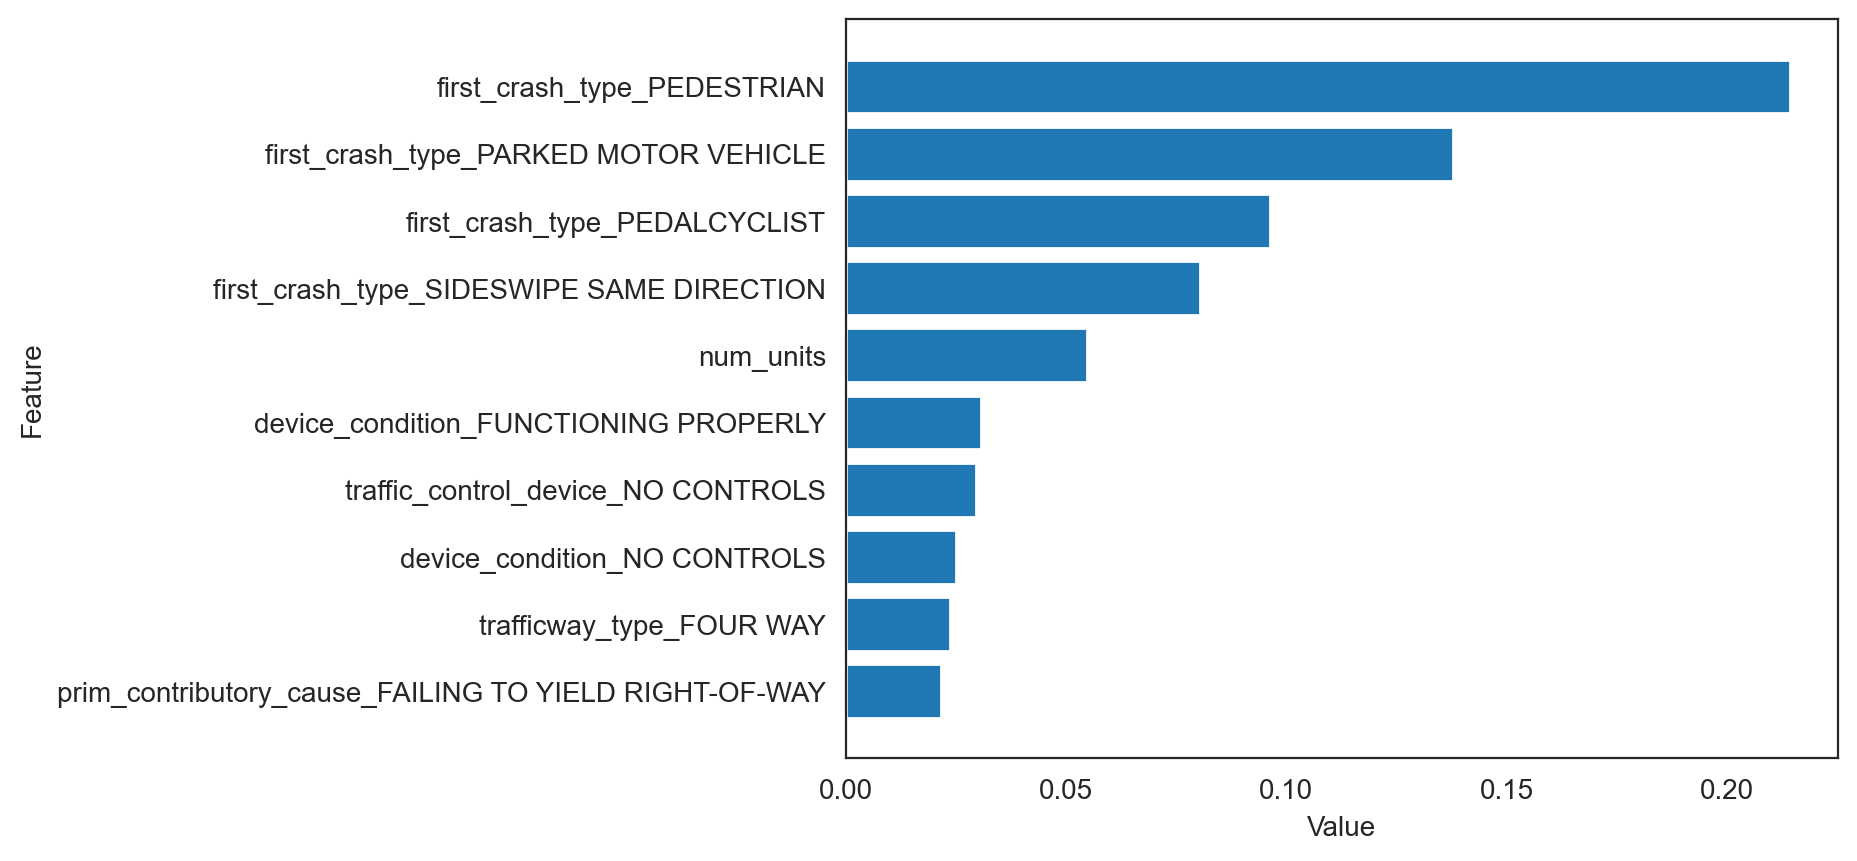

In [28]:
plot_coefficients(gs_rf.best_estimator_.named_steps.classifier.feature_importances_,X.columns,10)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=32, max_leaf_nodes=128,
                                        n_estimators=400, n_jobs=-1,
                                        random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.73   0.73
	              recall   0.73   0.73
	           precision   0.73   0.73
	   balanced_accuracy   0.73   0.73
	            accuracy   0.73   0.73
	             roc_auc   0.81   0.81

Params:
	{'classifier__max_depth': 32, 'classifier__max_leaf_nodes': 128}



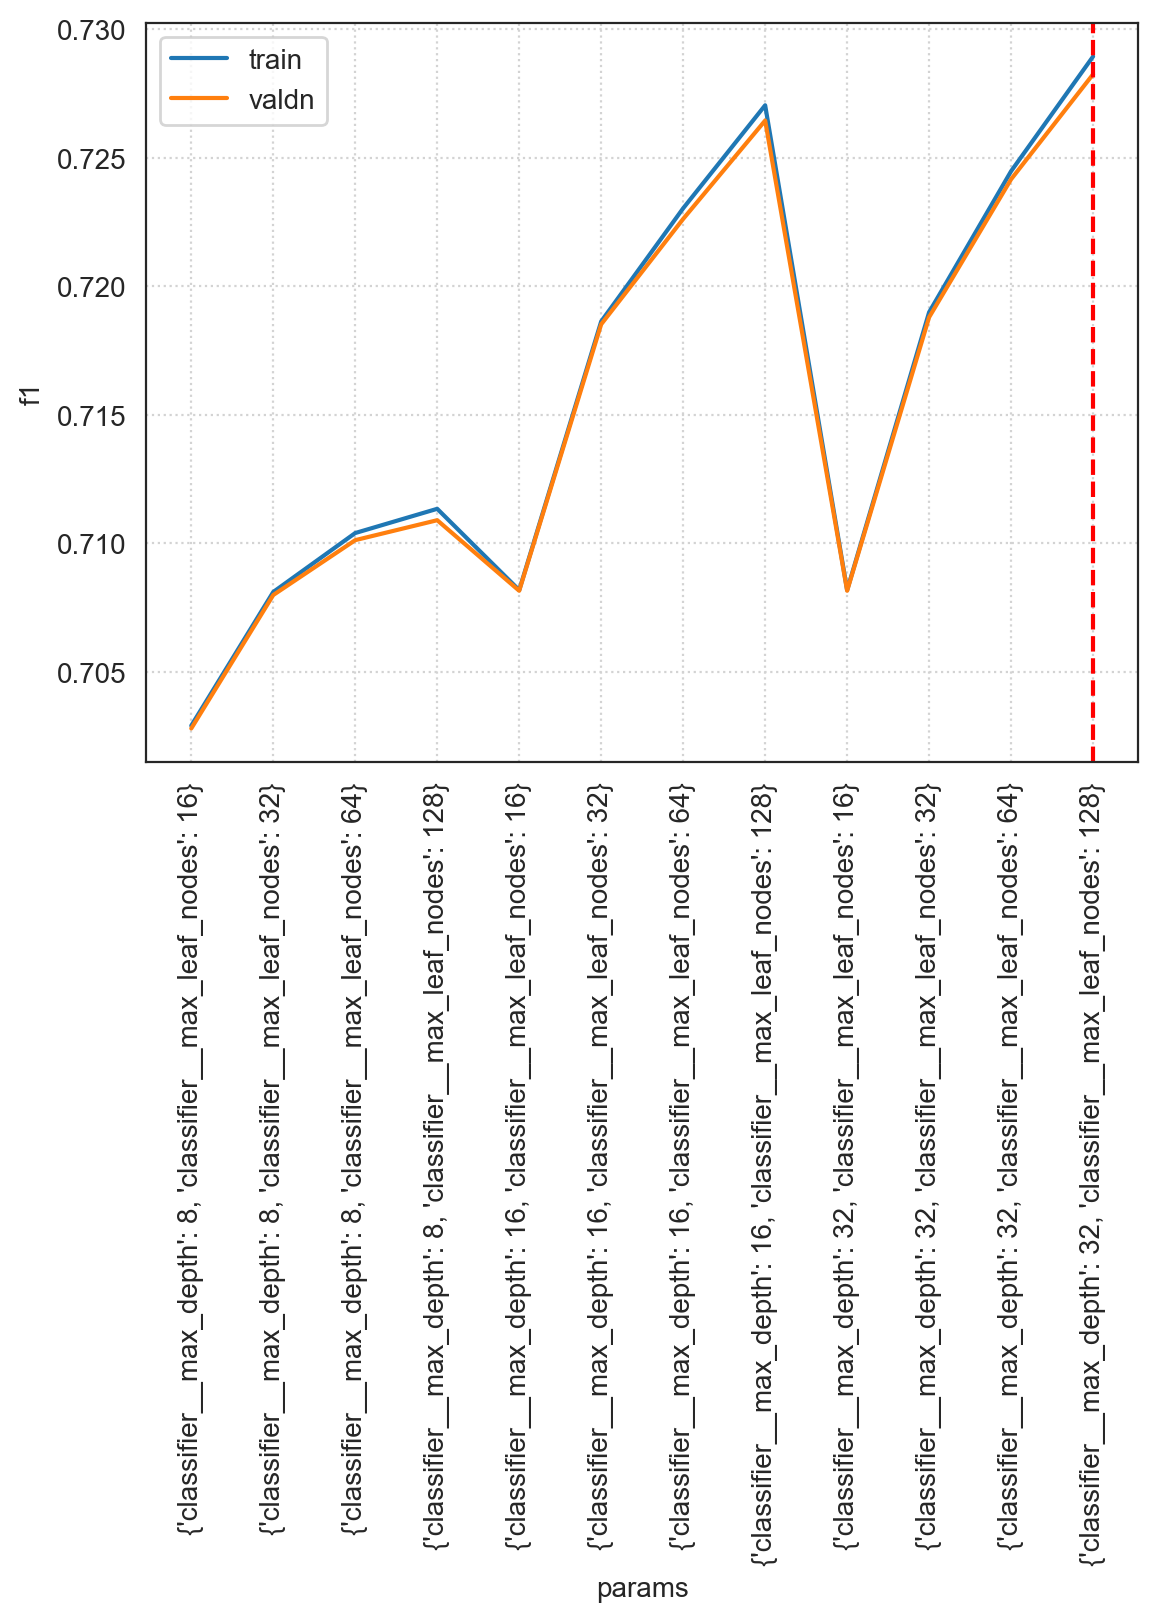

param                              f1       recall       precision       balanced_accuracy        \
   classifier__max_depth classifier__max_leaf_nodes test train   test train      test train              test train   
0                      8                         16  0.7   0.7   0.72  0.72      0.69  0.69               0.7   0.7   
1                      8                         32 0.71  0.71   0.72  0.72       0.7   0.7               0.7   0.7   
2                      8                         64 0.71  0.71   0.72  0.72       0.7   0.7               0.7   0.7   
3                      8                        128 0.71  0.71   0.72  0.72       0.7   0.7              0.71  0.71   
4                     16                         16 0.71  0.71   0.73  0.73      0.69  0.69               0.7   0.7   
5                     16                         32 0.72  0.72   0.74  0.74       0.7   0.7              0.71  0.71   
6                     16                         64 0.72  0.72   0.73  0.73      0.72  0.72              0.72  0.72   
7                     16                        128 0.73  0.73   0.73  0.73      0.73  0.73              0.73  0.73   
8                     32                         16 0.71  0.71   0.73  0.73      0.69  0.69               0.7   0.7   
9                     32                         32 0.72  0.72   0.74  0.74       0.7   0.7              0.71  0.71   
10                    32                         64 0.72  0.72   0.73  0.73      0.72  0.72              0.72  0.72   
11                    32                        128 0.73  0.73   0.73  0.73      0.73  0.73              0.73  0.73   

   accuracy       roc_auc        
       test train    test train  
0       0.7   0.7    0.79  0.79  
1       0.7   0.7     0.8   0.8  
2       0.7   0.7     0.8   0.8  
3      0.71  0.71     0.8   0.8  
4       0.7   0.7    0.79  0.79  
5      0.71  0.71     0.8   0.8  
6      0.72  0.72    0.81  0.81  
7      0.73  0.73    0.81  0.81  
8       0.7   0.7    0.79  0.79  
9      0.71  0.71     0.8   0.8  
10     0.72  0.72    0.81  0.81  
11     0.73  0.73    0.81  0.81



Test_Set Results:
accuracy score:           0.73
f1 score:                 0.42
recall score:             0.72
precision score:          0.30
balanced_accuracy score:  0.73
roc_auc score:            0.73
              precision    recall  f1-score   support

           0       0.94      0.73      0.82    135913
           1       0.30      0.72      0.42     21773

    accuracy                           0.73    157686
   macro avg       0.62      0.73      0.62    157686
weighted avg       0.85      0.73      0.77    157686



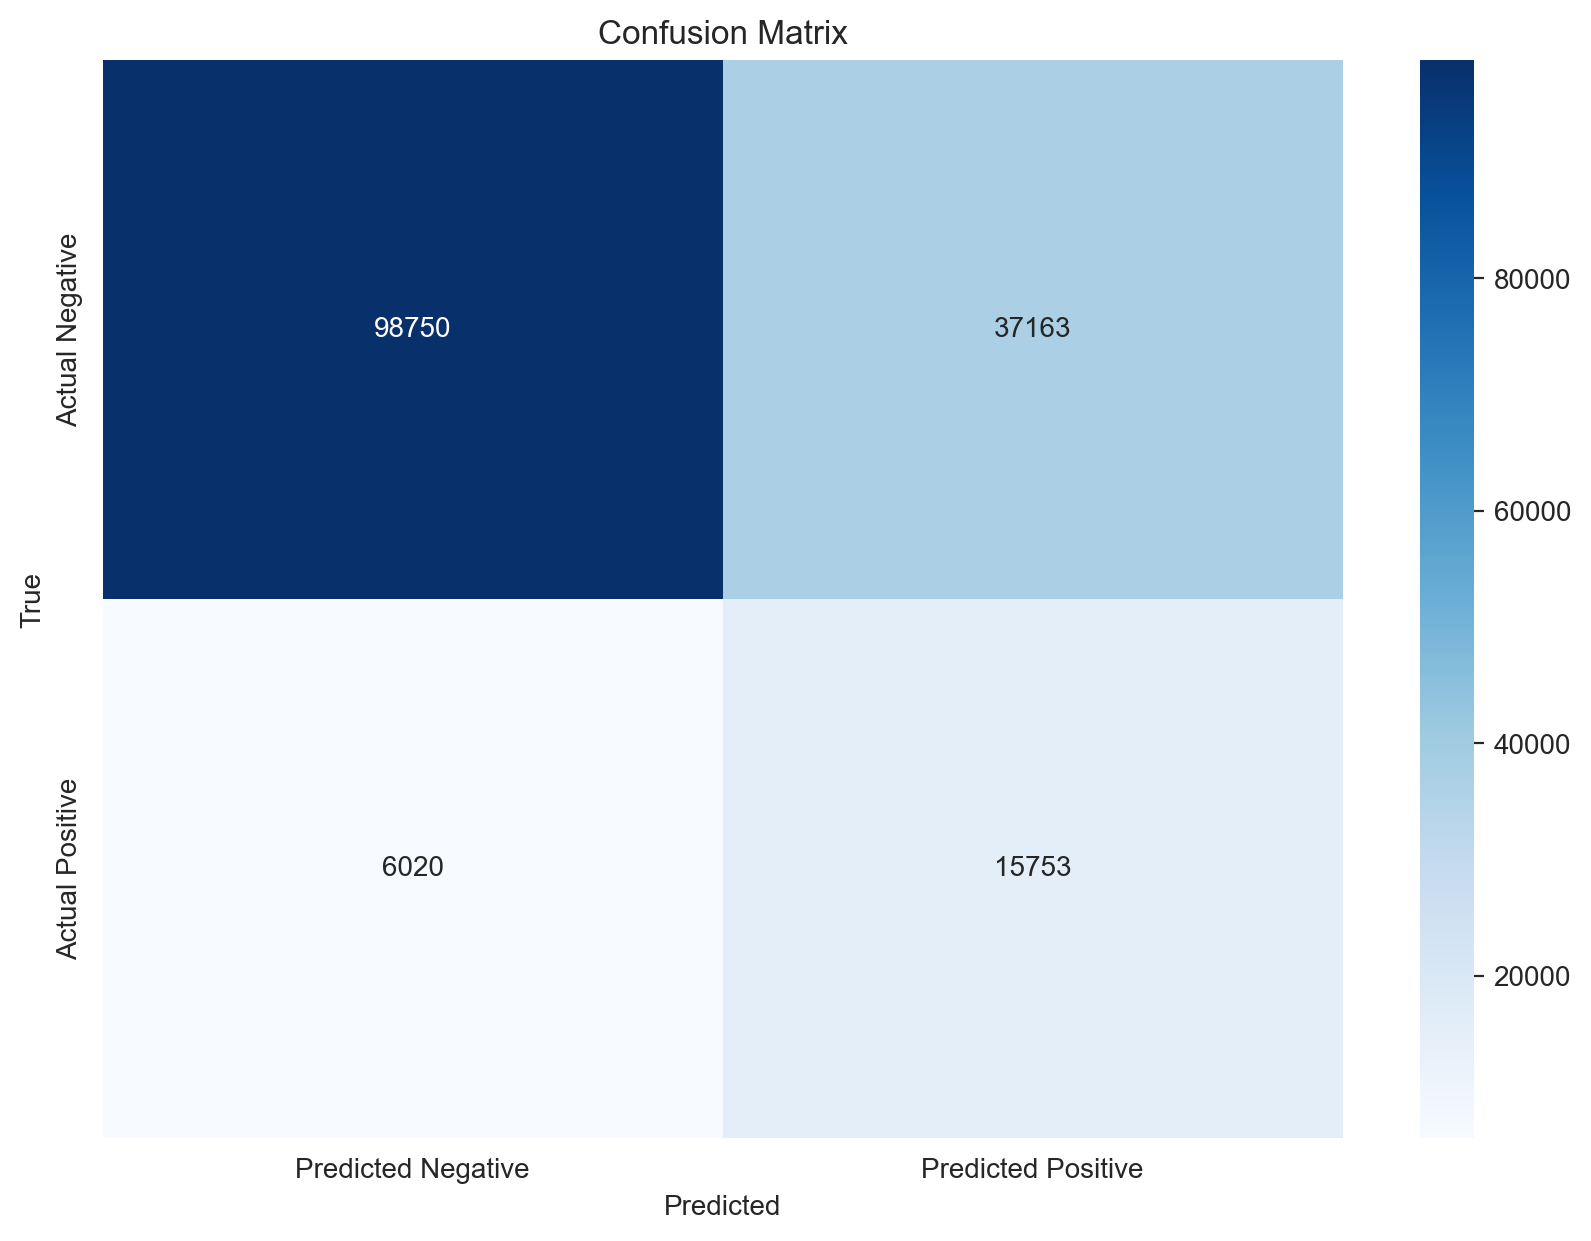

In [29]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', RandomForestClassifier(n_estimators=400, class_weight='balanced_subsample', n_jobs=-1, random_state=random_state))
    ]
)

params = {
#    'classifier__class_weight': ['balanced_subsample'],
#    'classifier__n_estimators': [300,400,500],
    'classifier__max_depth': [8,16,32],
#    'classifier__max_features': [.1,.3,.5],
#    'classifier__min_samples_split': [.01,.05,.1,.3,.5],
#    'classifier__min_samples_leaf': [8,16,32],
    'classifier__max_leaf_nodes': [16,32,64,128],
}
gs_rf = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_rf.fit(
    X_train_resampled,
    y_train_resampled
)
print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_rf, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_rf, X_test, y_test)

## ADA Boost

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\vanam\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(




Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={1: 5},
                                                                          max_depth=1),
                                    n_estimators=400, random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.46   0.46
	              recall   0.63   0.63
	           precision   0.36   0.36
	   balanced_accuracy   0.73   0.73
	            accuracy   0.80   0.80
	             roc_auc   0.82   0.82

Params:
	{'classifier__base_estimator__class_weight': {1: 5}, 'classifier__learning_rate': 1.0}



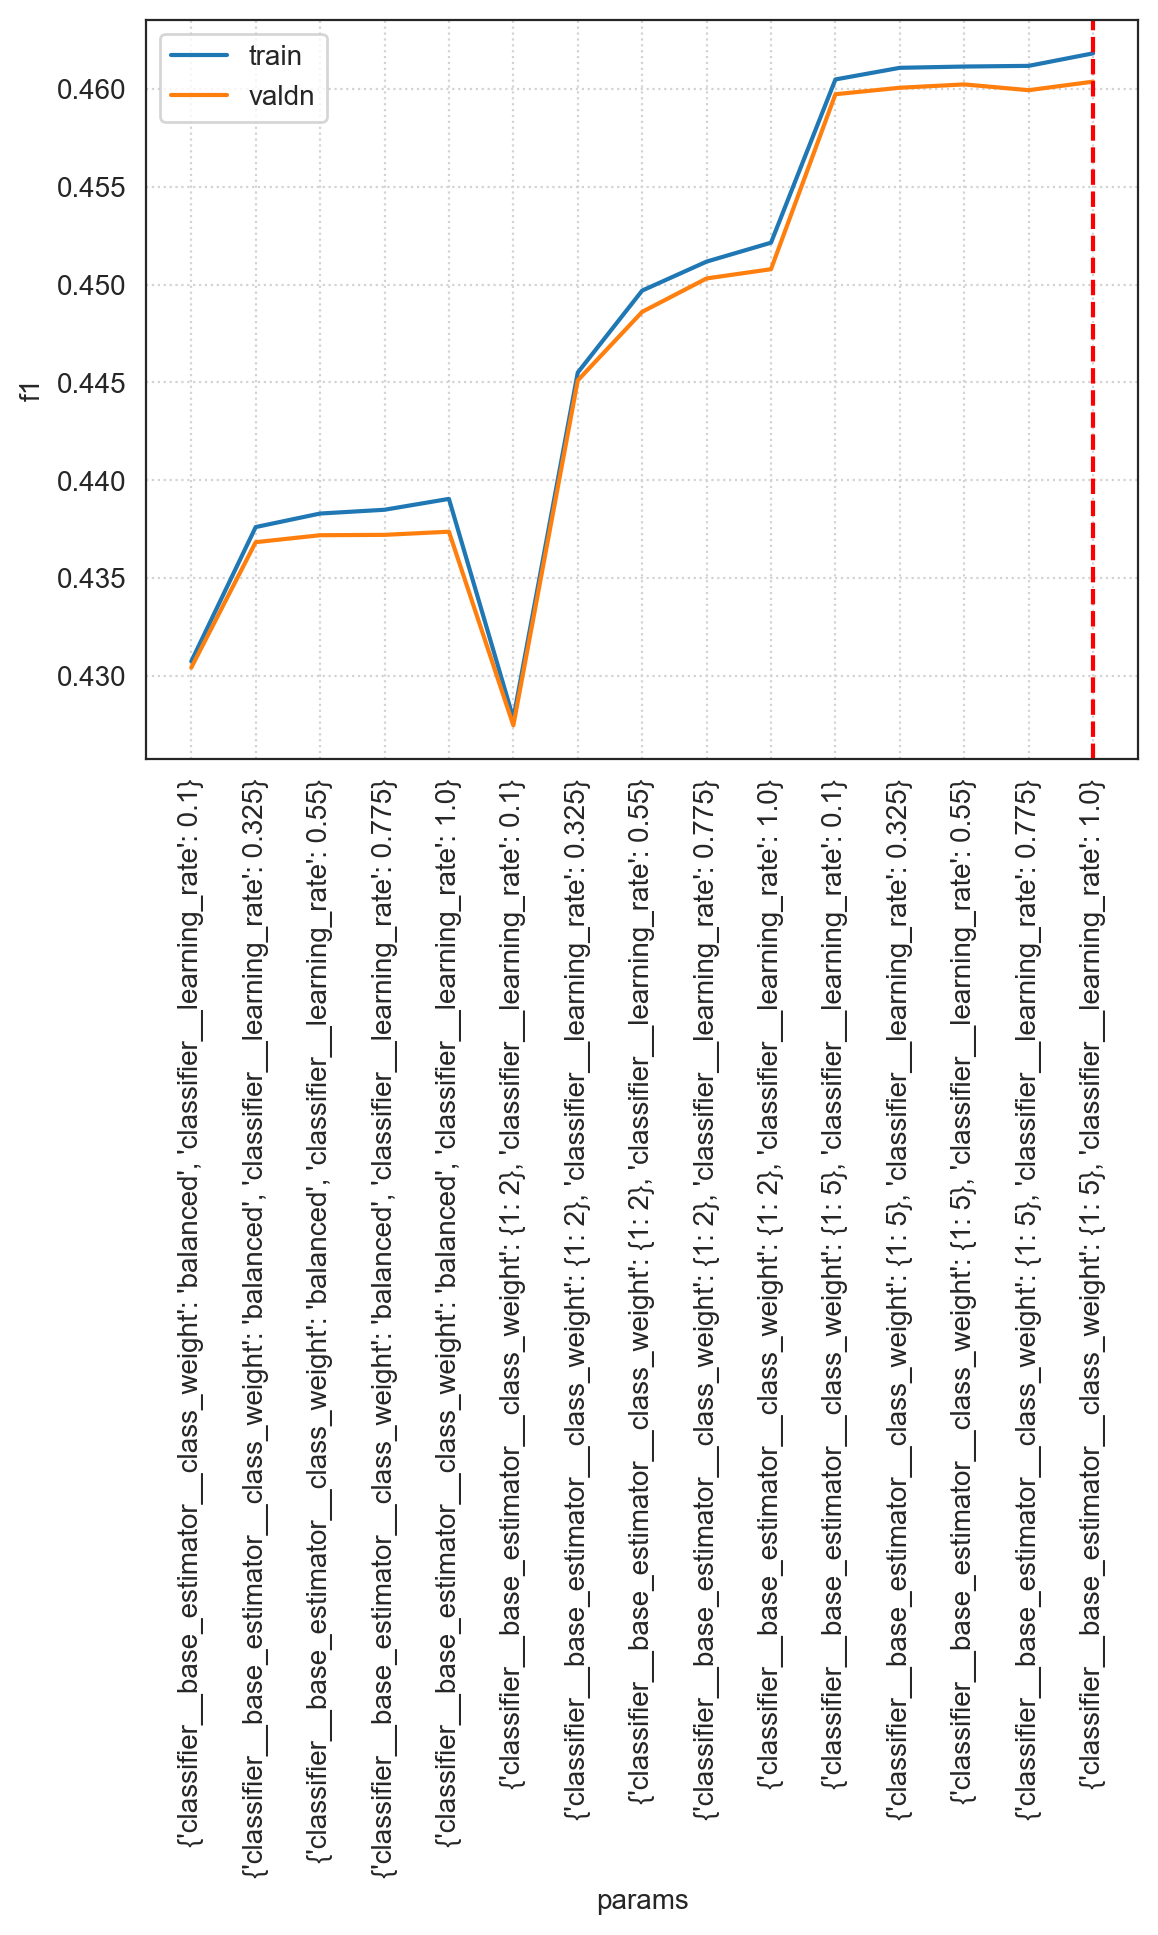

param                             f1       recall       precision        \
   classifier__base_estimator__class_weight classifier__learning_rate test train   test train      test train   
0                                  balanced                       0.1 0.43  0.43    0.7   0.7      0.31  0.31   
1                                  balanced                      0.33 0.44  0.44   0.71  0.71      0.32  0.32   
2                                  balanced                      0.55 0.44  0.44   0.71  0.71      0.32  0.32   
3                                  balanced                      0.78 0.44  0.44   0.71  0.71      0.32  0.32   
4                                  balanced                         1 0.44  0.44   0.71  0.71      0.32  0.32   
5                                    {1: 2}                       0.1 0.43  0.43   0.32  0.32      0.65  0.65   
6                                    {1: 2}                      0.33 0.45  0.45   0.35  0.35      0.61  0.61   
7                                    {1: 2}                      0.55 0.45  0.45   0.36  0.36       0.6   0.6   
8                                    {1: 2}                      0.78 0.45  0.45   0.36  0.36      0.59  0.59   
9                                    {1: 2}                         1 0.45  0.45   0.36  0.37      0.59  0.59   
10                                   {1: 5}                       0.1 0.46  0.46   0.59  0.59      0.38  0.38   
11                                   {1: 5}                      0.33 0.46  0.46   0.62  0.62      0.37  0.37   
12                                   {1: 5}                      0.55 0.46  0.46   0.63  0.63      0.36  0.36   
13                                   {1: 5}                      0.78 0.46  0.46   0.63  0.63      0.36  0.36   
14                                   {1: 5}                         1 0.46  0.46   0.63  0.63      0.36  0.36   

   balanced_accuracy       accuracy       roc_auc        
                test train     test train    test train  
0               0.73  0.73     0.75  0.75    0.81  0.81  
1               0.73  0.73     0.75  0.75    0.82  0.82  
2               0.73  0.73     0.75  0.75    0.82  0.82  
3               0.73  0.73     0.75  0.75    0.82  0.82  
4               0.73  0.73     0.75  0.75    0.82  0.82  
5               0.65  0.65     0.88  0.88    0.81  0.81  
6               0.66  0.66     0.88  0.88    0.82  0.82  
7               0.66  0.66     0.88  0.88    0.82  0.82  
8               0.66  0.66     0.88  0.88    0.82  0.82  
9               0.66  0.66     0.88  0.88    0.82  0.82  
10              0.72  0.72     0.81  0.81    0.81  0.81  
11              0.72  0.73      0.8   0.8    0.82  0.82  
12              0.73  0.73      0.8   0.8    0.82  0.82  
13              0.73  0.73      0.8   0.8    0.82  0.82  
14              0.73  0.73      0.8   0.8    0.82  0.82



Test_Set Results:
accuracy score:           0.80
f1 score:                 0.46
recall score:             0.63
precision score:          0.36
balanced_accuracy score:  0.73
roc_auc score:            0.73
              precision    recall  f1-score   support

           0       0.93      0.82      0.88    135913
           1       0.36      0.63      0.46     21773

    accuracy                           0.80    157686
   macro avg       0.65      0.73      0.67    157686
weighted avg       0.85      0.80      0.82    157686



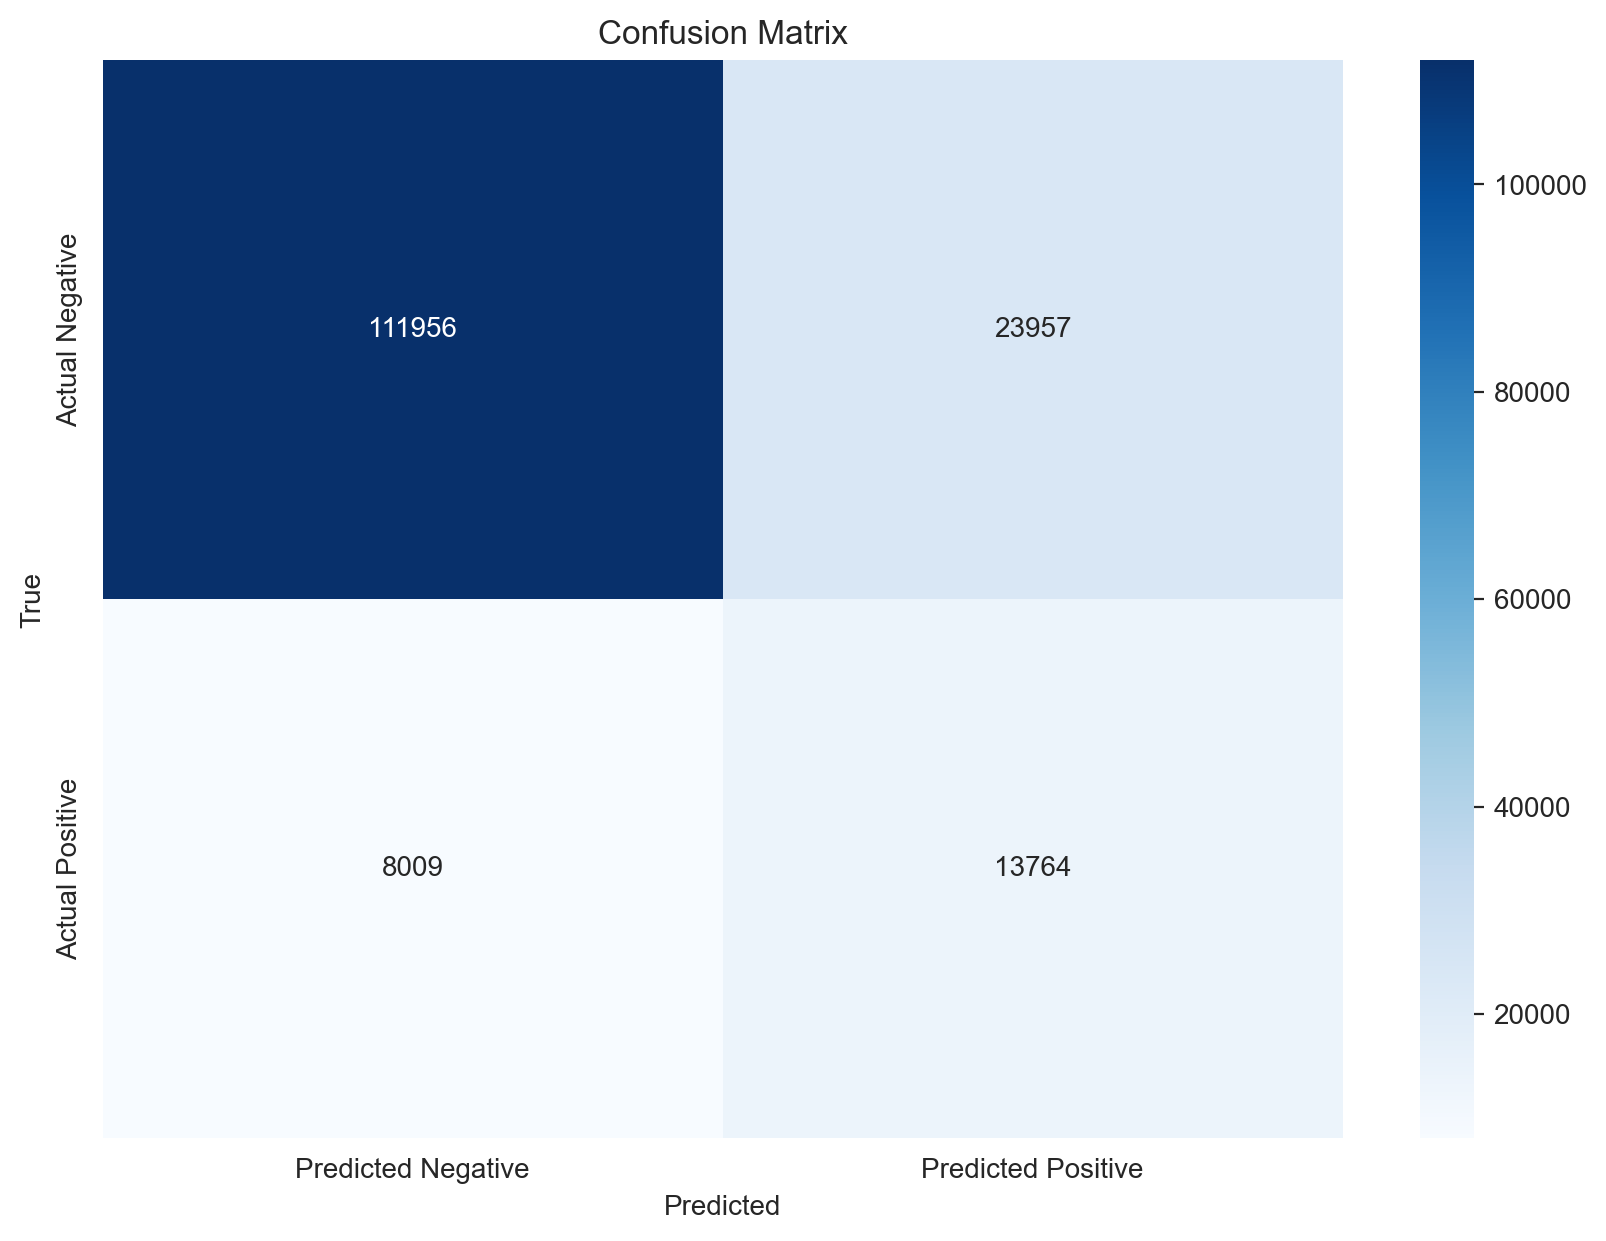

In [30]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', AdaBoostClassifier(n_estimators=400, base_estimator=DecisionTreeClassifier(class_weight='balanced', max_depth=1), random_state=random_state))
    ]
)

params = {
    'classifier__base_estimator__class_weight': ['balanced',{1:2},{1:5}],
#    'classifier__base_estimator__max_depth': [1, 2, 3],
#    'classifier__n_estimators': [400,500,600],
    'classifier__learning_rate': np.linspace(.1,1,5),
}
gs_ab = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_ab.fit(
    X_train,
    y_train
)
print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_ab, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_ab, X_test, y_test)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\vanam\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(




Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                          max_depth=1),
                                    learning_rate=1.525, n_estimators=400,
                                    random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.73   0.73
	              recall   0.71   0.71
	           precision   0.75   0.75
	   balanced_accuracy   0.73   0.73
	            accuracy   0.73   0.73
	             roc_auc   0.82   0.82

Params:
	{'classifier__learning_rate': 1.525}



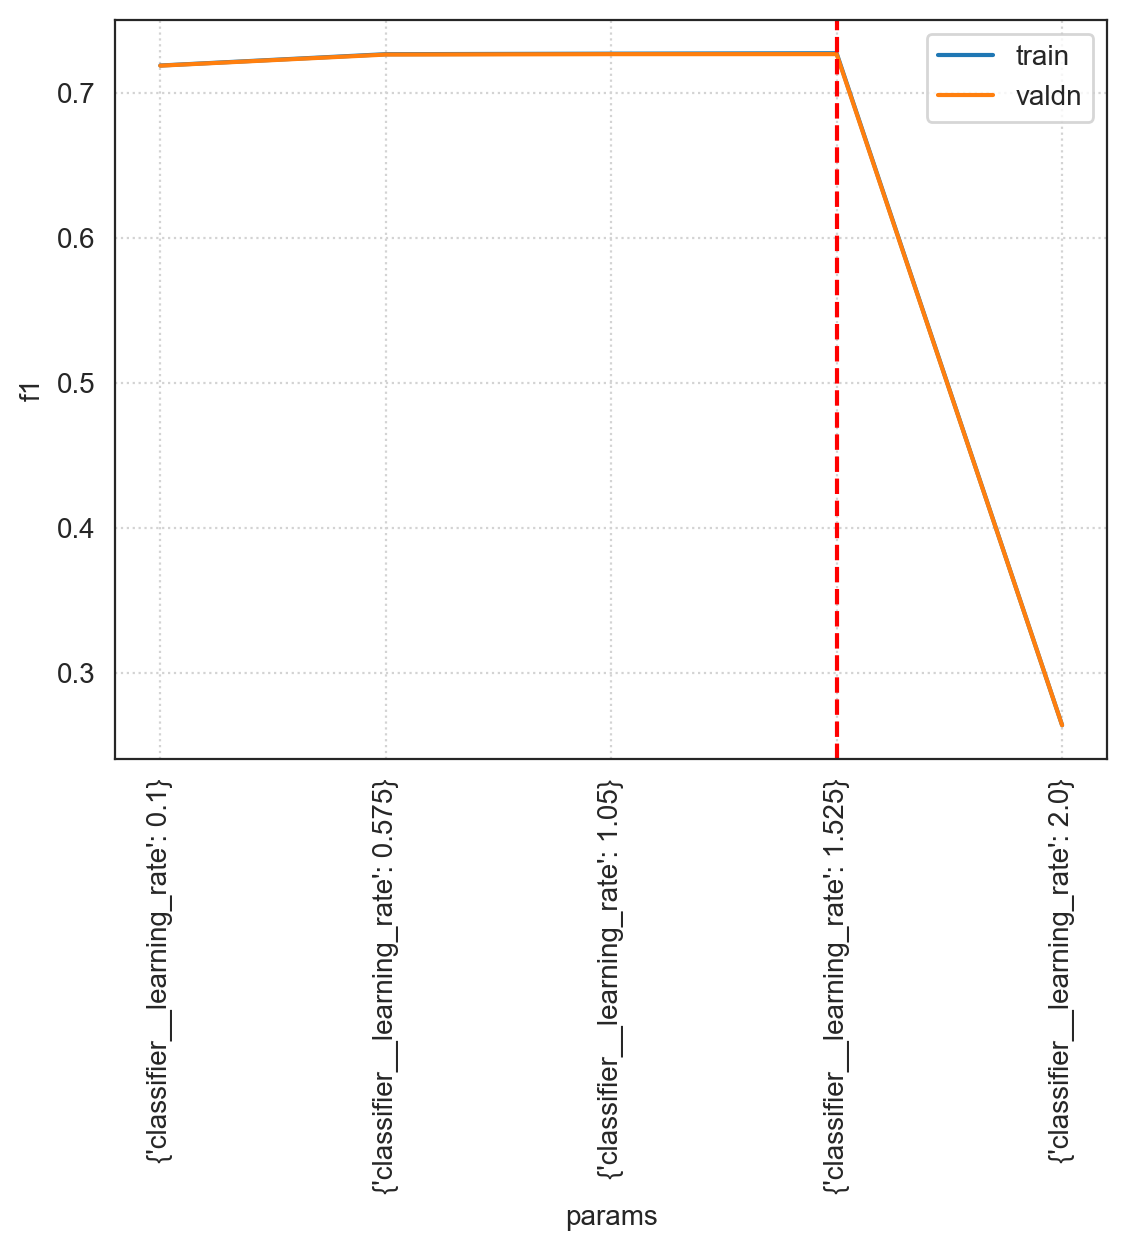

param   f1       recall       precision       balanced_accuracy       accuracy       roc_auc  \
  classifier__learning_rate test train   test train      test train              test train     test train    test   
0                       0.1 0.72  0.72    0.7   0.7      0.74  0.74              0.73  0.73     0.73  0.73    0.81   
1                      0.57 0.73  0.73   0.71  0.71      0.74  0.74              0.73  0.73     0.73  0.73    0.82   
2                       1.1 0.73  0.73   0.71  0.71      0.74  0.75              0.73  0.73     0.73  0.73    0.82   
3                       1.5 0.73  0.73   0.71  0.71      0.75  0.75              0.73  0.73     0.73  0.73    0.82   
4                         2 0.26  0.26   0.33  0.33      0.25  0.25               0.5   0.5      0.5   0.5    0.47   

         
  train  
0  0.81  
1  0.82  
2  0.82  
3  0.82  
4  0.47



Test_Set Results:
accuracy score:           0.75
f1 score:                 0.44
recall score:             0.71
precision score:          0.32
balanced_accuracy score:  0.73
roc_auc score:            0.73
              precision    recall  f1-score   support

           0       0.94      0.75      0.84    135913
           1       0.32      0.71      0.44     21773

    accuracy                           0.75    157686
   macro avg       0.63      0.73      0.64    157686
weighted avg       0.86      0.75      0.78    157686



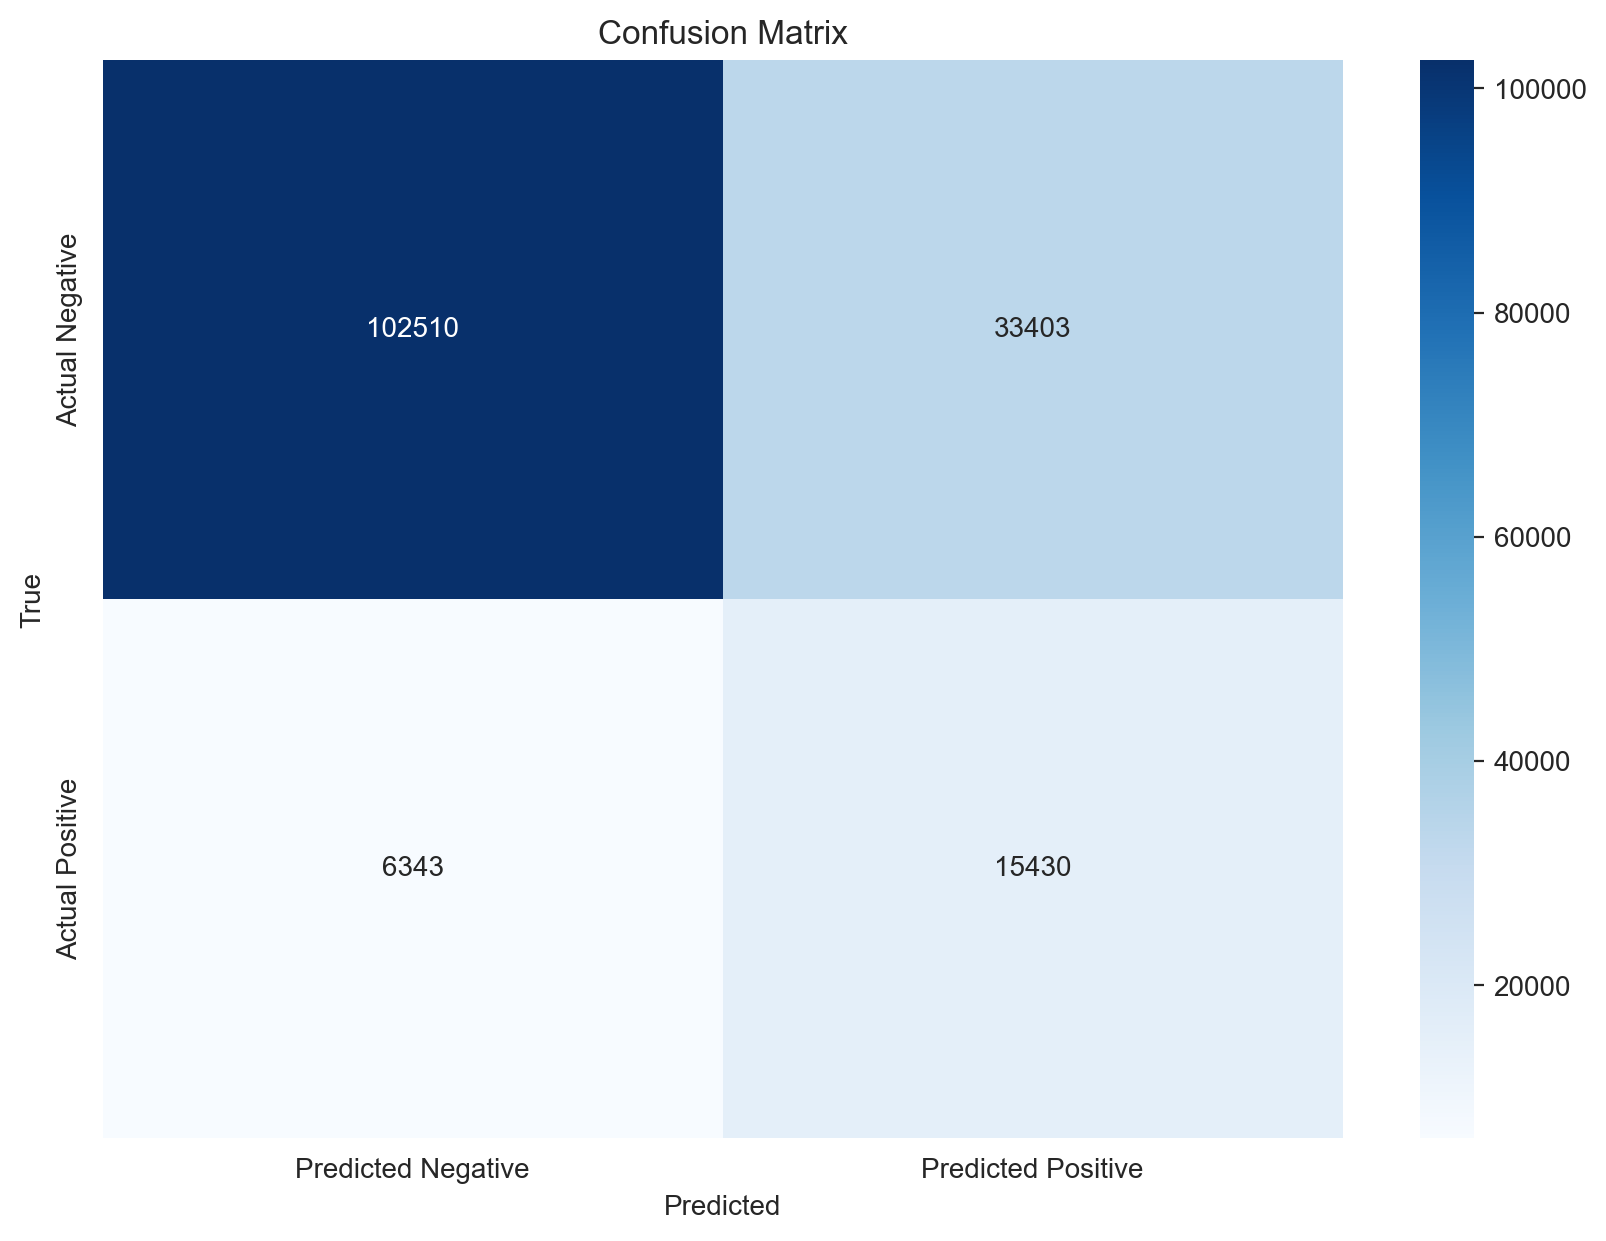

In [31]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', AdaBoostClassifier(n_estimators=400, base_estimator=DecisionTreeClassifier(class_weight='balanced', max_depth=1), random_state=random_state))
    ]
)

params = {
#    'classifier__base_estimator__class_weight': ['balanced',{1:2},{1:5}],
#    'classifier__base_estimator__max_depth': [1, 2, 3],
#    'classifier__n_estimators': [400,500,600],
    'classifier__learning_rate': np.linspace(.1,2,5),
}
gs_ab = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_ab.fit(
    X_train_resampled,
    y_train_resampled
)
print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_ab, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_ab, X_test, y_test)

## Gradient Boost

Fitting 3 folds for each of 5 candidates, totalling 15 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.57,
                                            n_estimators=400,
                                            random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.43   0.40
	              recall   0.30   0.28
	           precision   0.77   0.71
	   balanced_accuracy   0.64   0.63
	            accuracy   0.89   0.89
	             roc_auc   0.84   0.82

Params:
	{'classifier__learning_rate': 0.57}



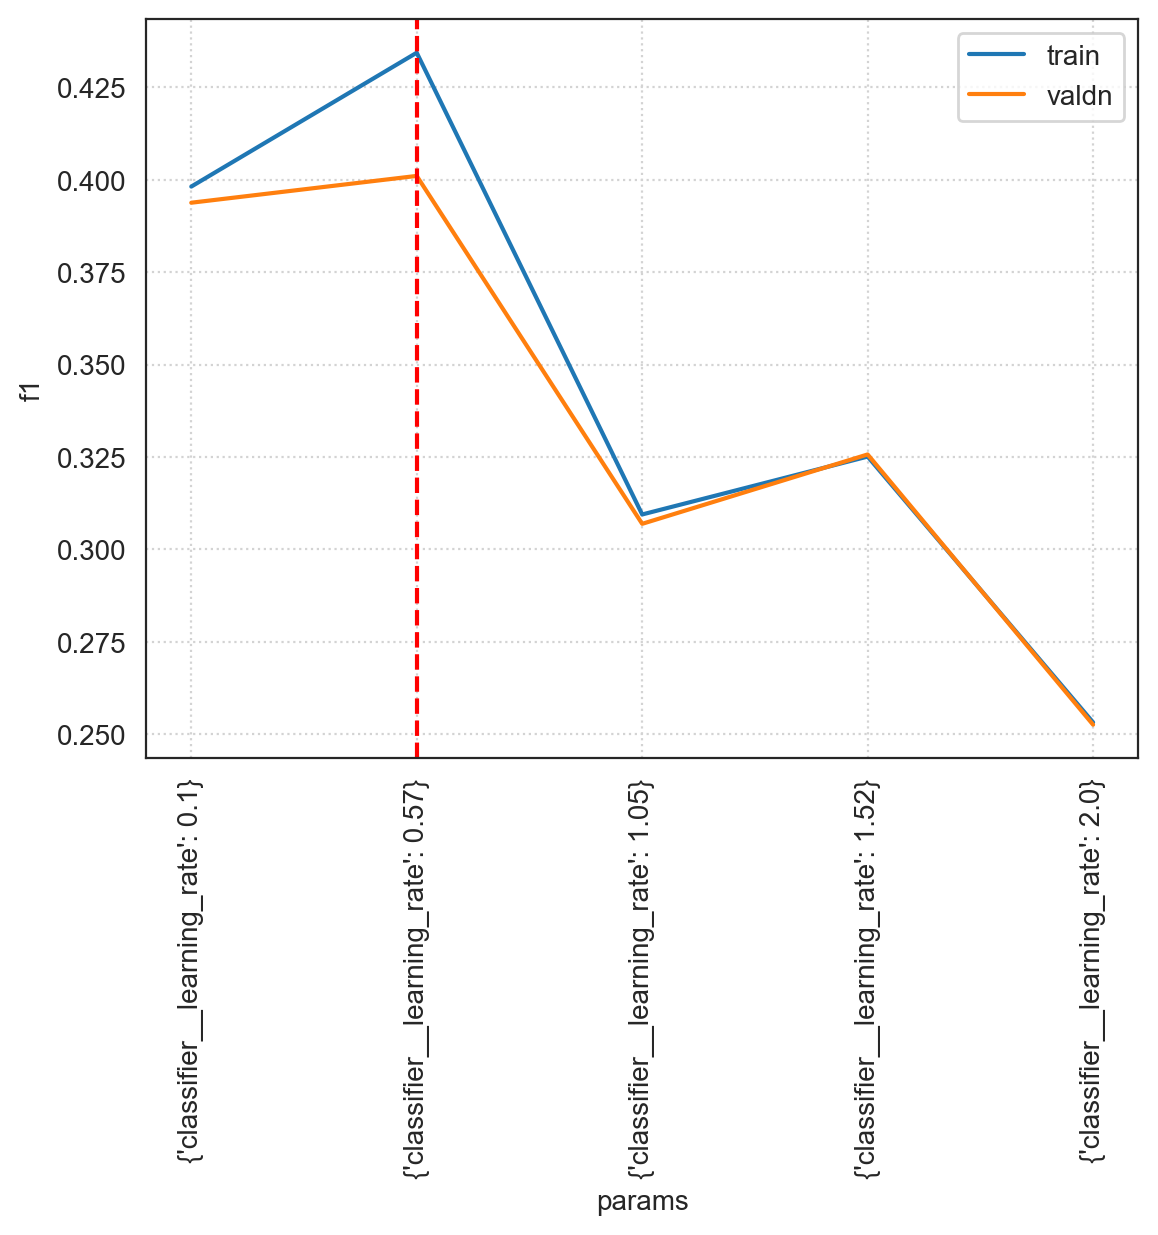

param   f1       recall       precision       balanced_accuracy       accuracy       roc_auc  \
  classifier__learning_rate test train   test train      test train              test train     test train    test   
0                       0.1 0.39   0.4   0.27  0.27      0.75  0.76              0.63  0.63     0.89  0.89    0.82   
1                      0.57  0.4  0.43   0.28   0.3      0.71  0.77              0.63  0.64     0.89  0.89    0.82   
2                       1.1 0.31  0.31   0.19   0.2      0.74  0.74              0.59  0.59     0.88  0.88    0.75   
3                       1.5 0.33  0.33   0.22  0.22      0.67  0.67               0.6   0.6     0.88  0.88    0.71   
4                         2 0.25  0.25   0.62  0.62      0.31  0.31              0.52  0.52     0.46  0.46    0.53   

         
  train  
0  0.83  
1  0.84  
2  0.75  
3  0.71  
4  0.54



Test_Set Results:
accuracy score:           0.89
f1 score:                 0.40
recall score:             0.28
precision score:          0.72
balanced_accuracy score:  0.63
roc_auc score:            0.63
              precision    recall  f1-score   support

           0       0.89      0.98      0.94    135913
           1       0.72      0.28      0.40     21773

    accuracy                           0.89    157686
   macro avg       0.81      0.63      0.67    157686
weighted avg       0.87      0.89      0.86    157686



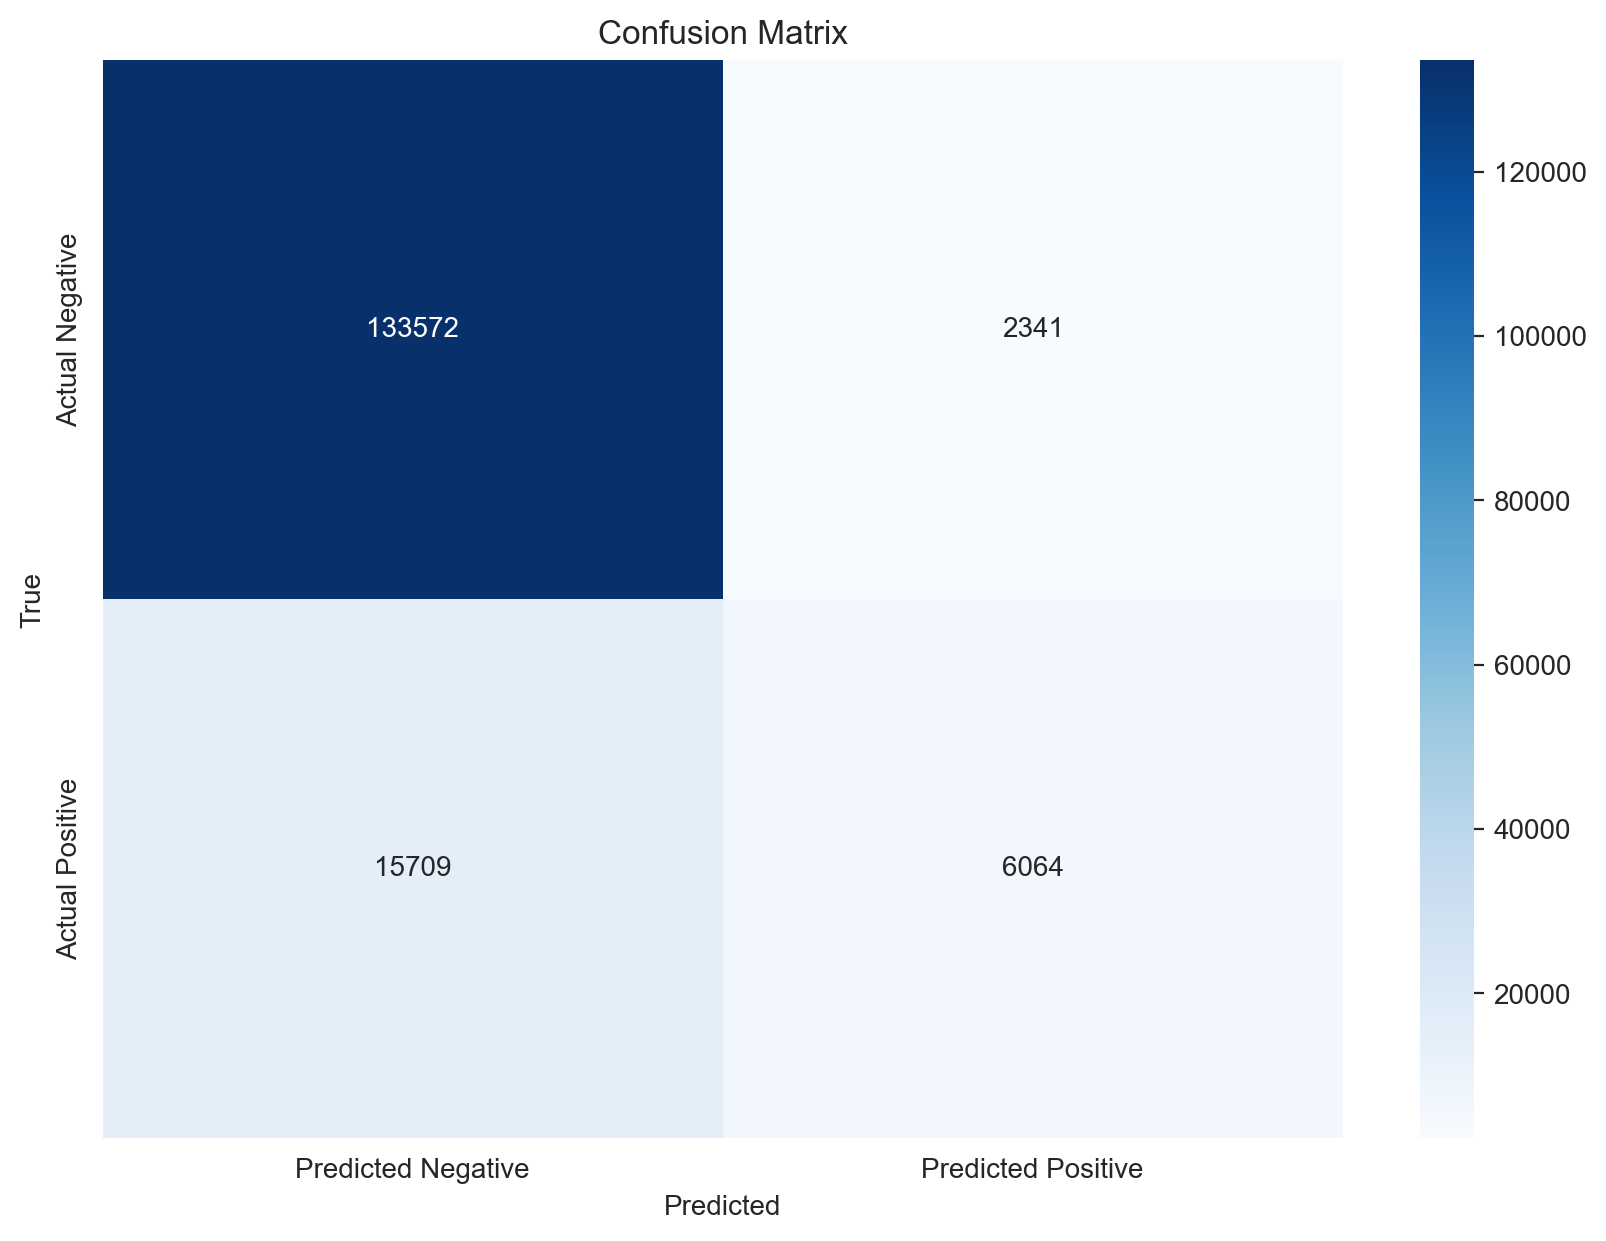

In [32]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', GradientBoostingClassifier(n_estimators=400, random_state=random_state))
    ]
)

params = {
#    'classifier__n_estimators': [500],
#    'classifier__subsample': [.1,.2,.3],
#    'classifier__min_samples_split': [.05,.1,.2,.3],
    'classifier__learning_rate': np.linspace(.1,2,5).round(2),
}
gs_gb = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_gb.fit(
    X_train,
    y_train
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_gb, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_gb, X_test, y_test)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=1.05,
                                            n_estimators=400,
                                            random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.76   0.75
	              recall   0.76   0.75
	           precision   0.76   0.76
	   balanced_accuracy   0.76   0.75
	            accuracy   0.76   0.75
	             roc_auc   0.85   0.84

Params:
	{'classifier__learning_rate': 1.05}



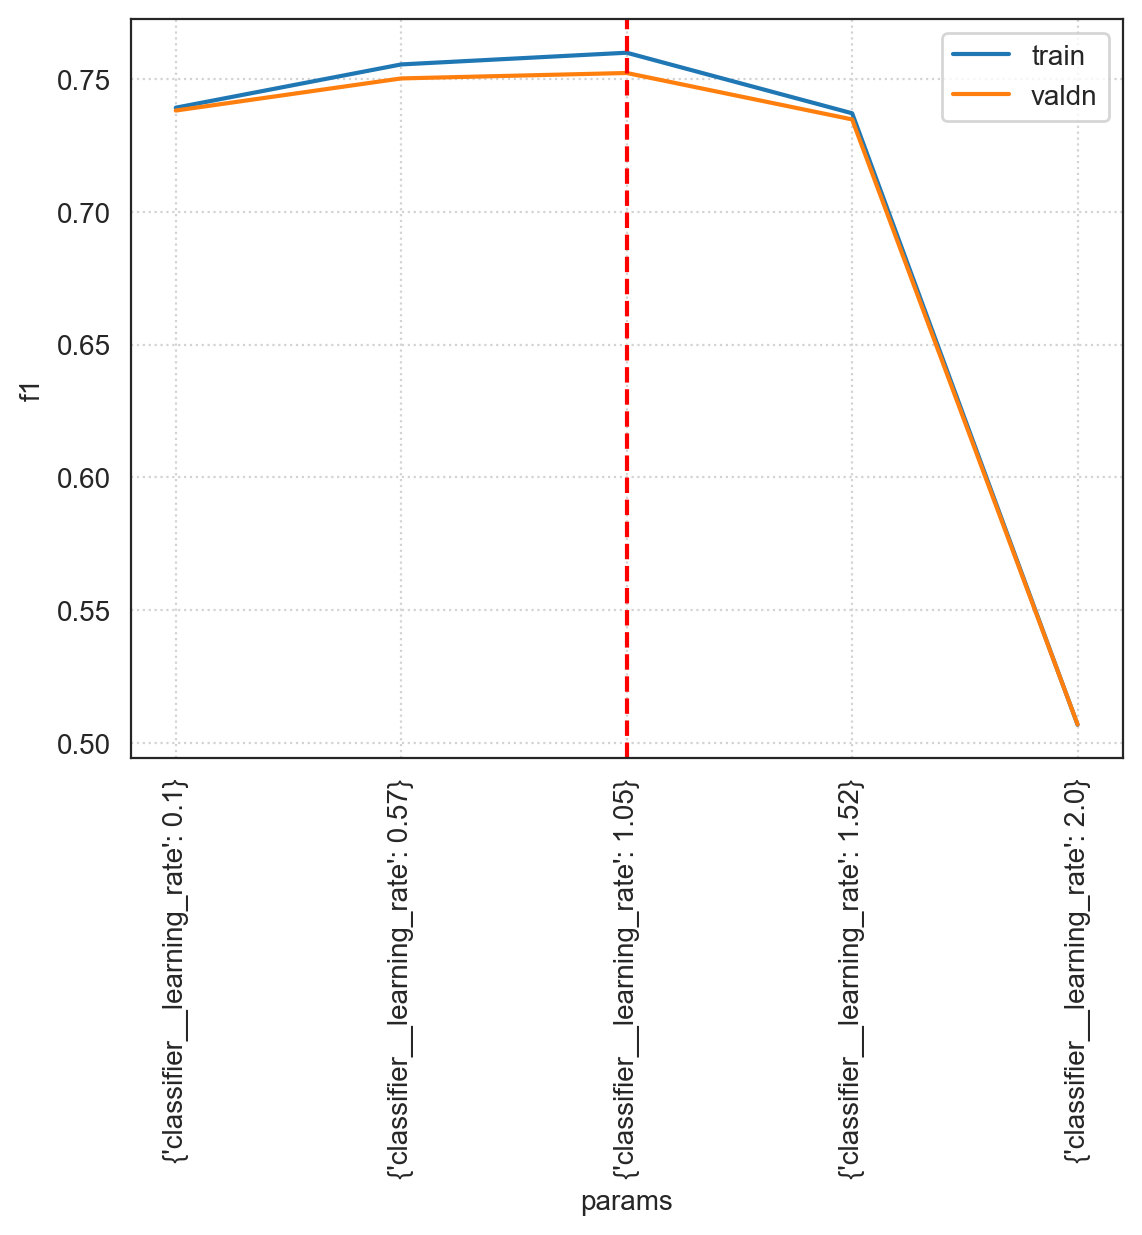

param   f1       recall       precision       balanced_accuracy       accuracy       roc_auc  \
  classifier__learning_rate test train   test train      test train              test train     test train    test   
0                       0.1 0.74  0.74   0.73  0.73      0.75  0.75              0.74  0.74     0.74  0.74    0.83   
1                      0.57 0.75  0.76   0.74  0.75      0.76  0.76              0.75  0.76     0.75  0.76    0.84   
2                       1.1 0.75  0.76   0.75  0.76      0.76  0.76              0.75  0.76     0.75  0.76    0.84   
3                       1.5 0.73  0.74   0.73  0.73      0.74  0.75              0.74  0.74     0.74  0.74    0.82   
4                         2 0.51  0.51   0.64  0.64      0.45  0.45              0.48  0.48     0.48  0.48    0.45   

         
  train  
0  0.83  
1  0.85  
2  0.85  
3  0.82  
4  0.45



Test_Set Results:
accuracy score:           0.75
f1 score:                 0.44
recall score:             0.71
precision score:          0.32
balanced_accuracy score:  0.73
roc_auc score:            0.73
              precision    recall  f1-score   support

           0       0.94      0.76      0.84    135913
           1       0.32      0.71      0.44     21773

    accuracy                           0.75    157686
   macro avg       0.63      0.73      0.64    157686
weighted avg       0.86      0.75      0.79    157686



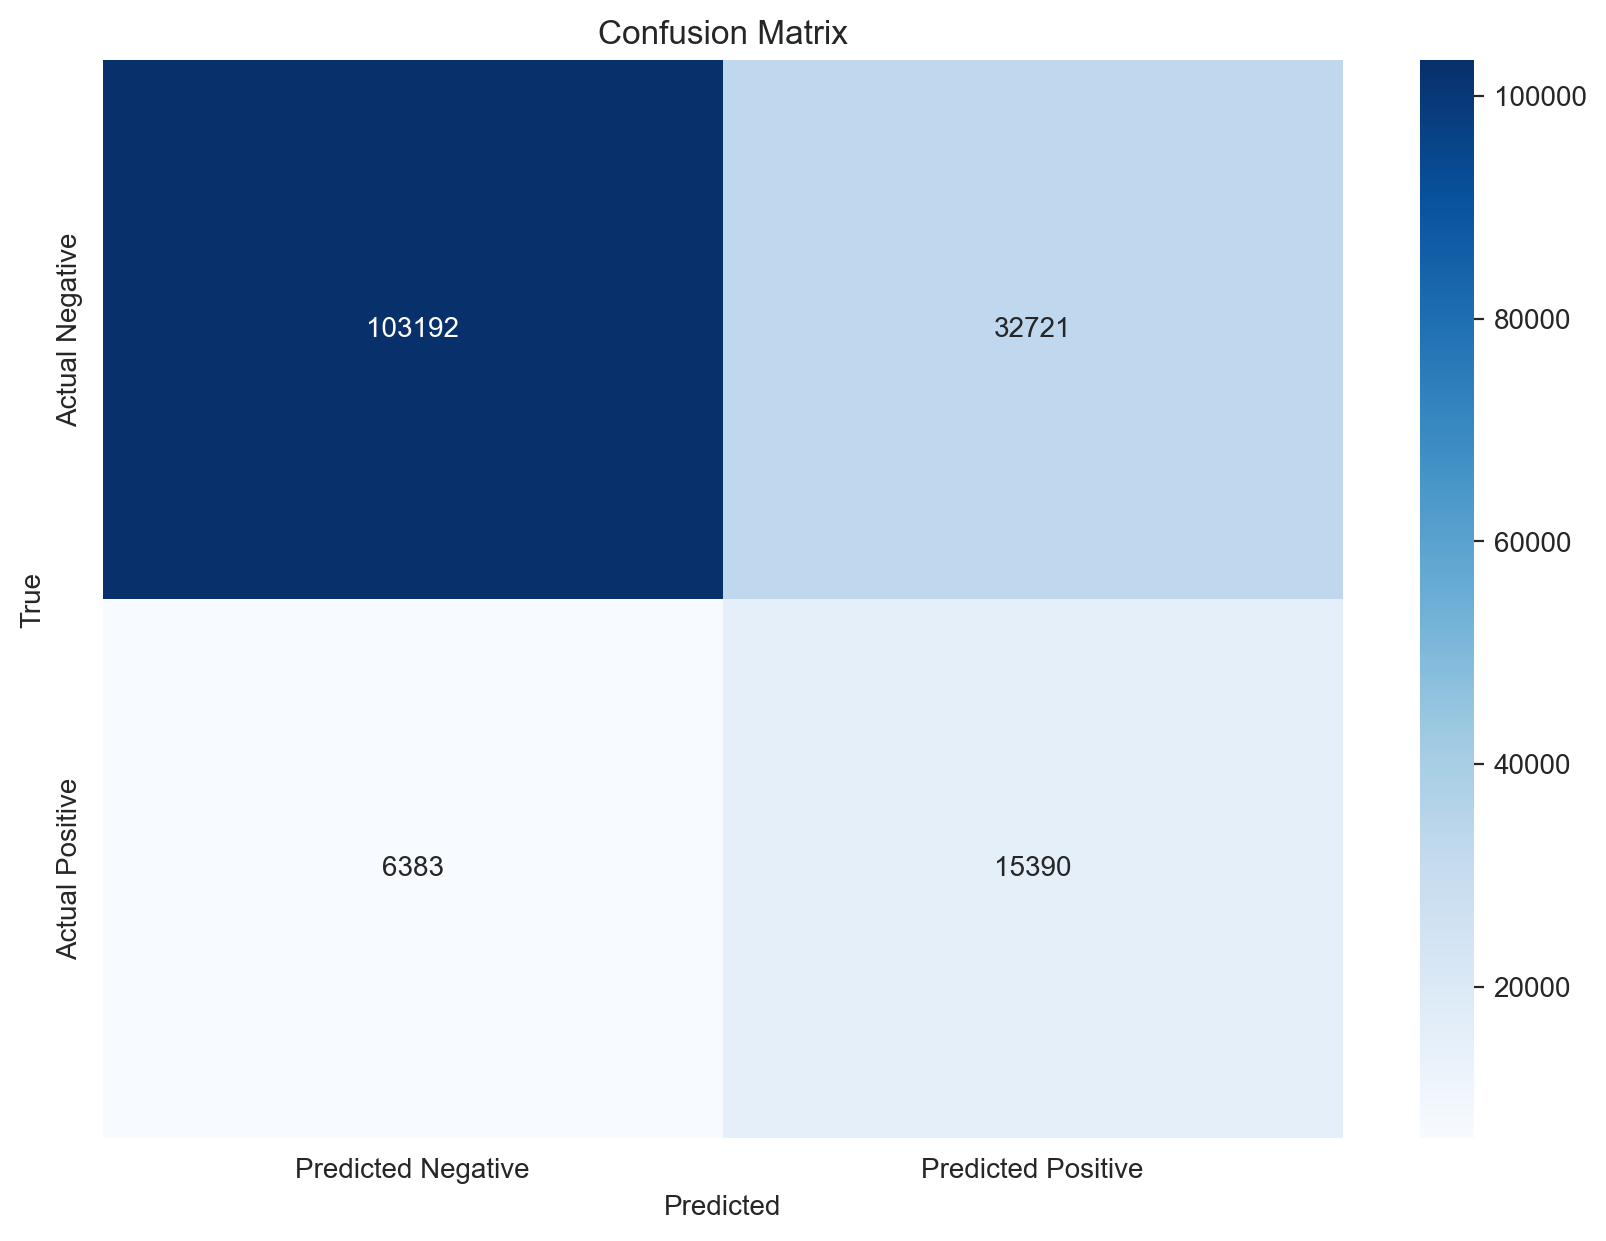

In [33]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', GradientBoostingClassifier(n_estimators=400, random_state=random_state))
    ]
)

params = {
#    'classifier__n_estimators': [500],
#    'classifier__subsample': [.1,.2,.3],
#    'classifier__min_samples_split': [.05,.1,.2,.3],
    'classifier__learning_rate': np.linspace(.1,2,5).round(2),
}
gs_gb = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_gb.fit(
    X_train_resampled,
    y_train_resampled
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_gb, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_gb, X_test, y_test)


## Bagging

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\vanam\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(




Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={1: 5},
                                                                         max_depth=8),
                                   n_estimators=50, random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.45   0.44
	              recall   0.48   0.47
	           precision   0.42   0.41
	   balanced_accuracy   0.69   0.68
	            accuracy   0.84   0.84
	             roc_auc   0.79   0.79

Params:
	{'classifier__base_estimator__class_weight': {1: 5}, 'classifier__base_estimator__max_depth': 8, 'classifier__n_estimators': 50}



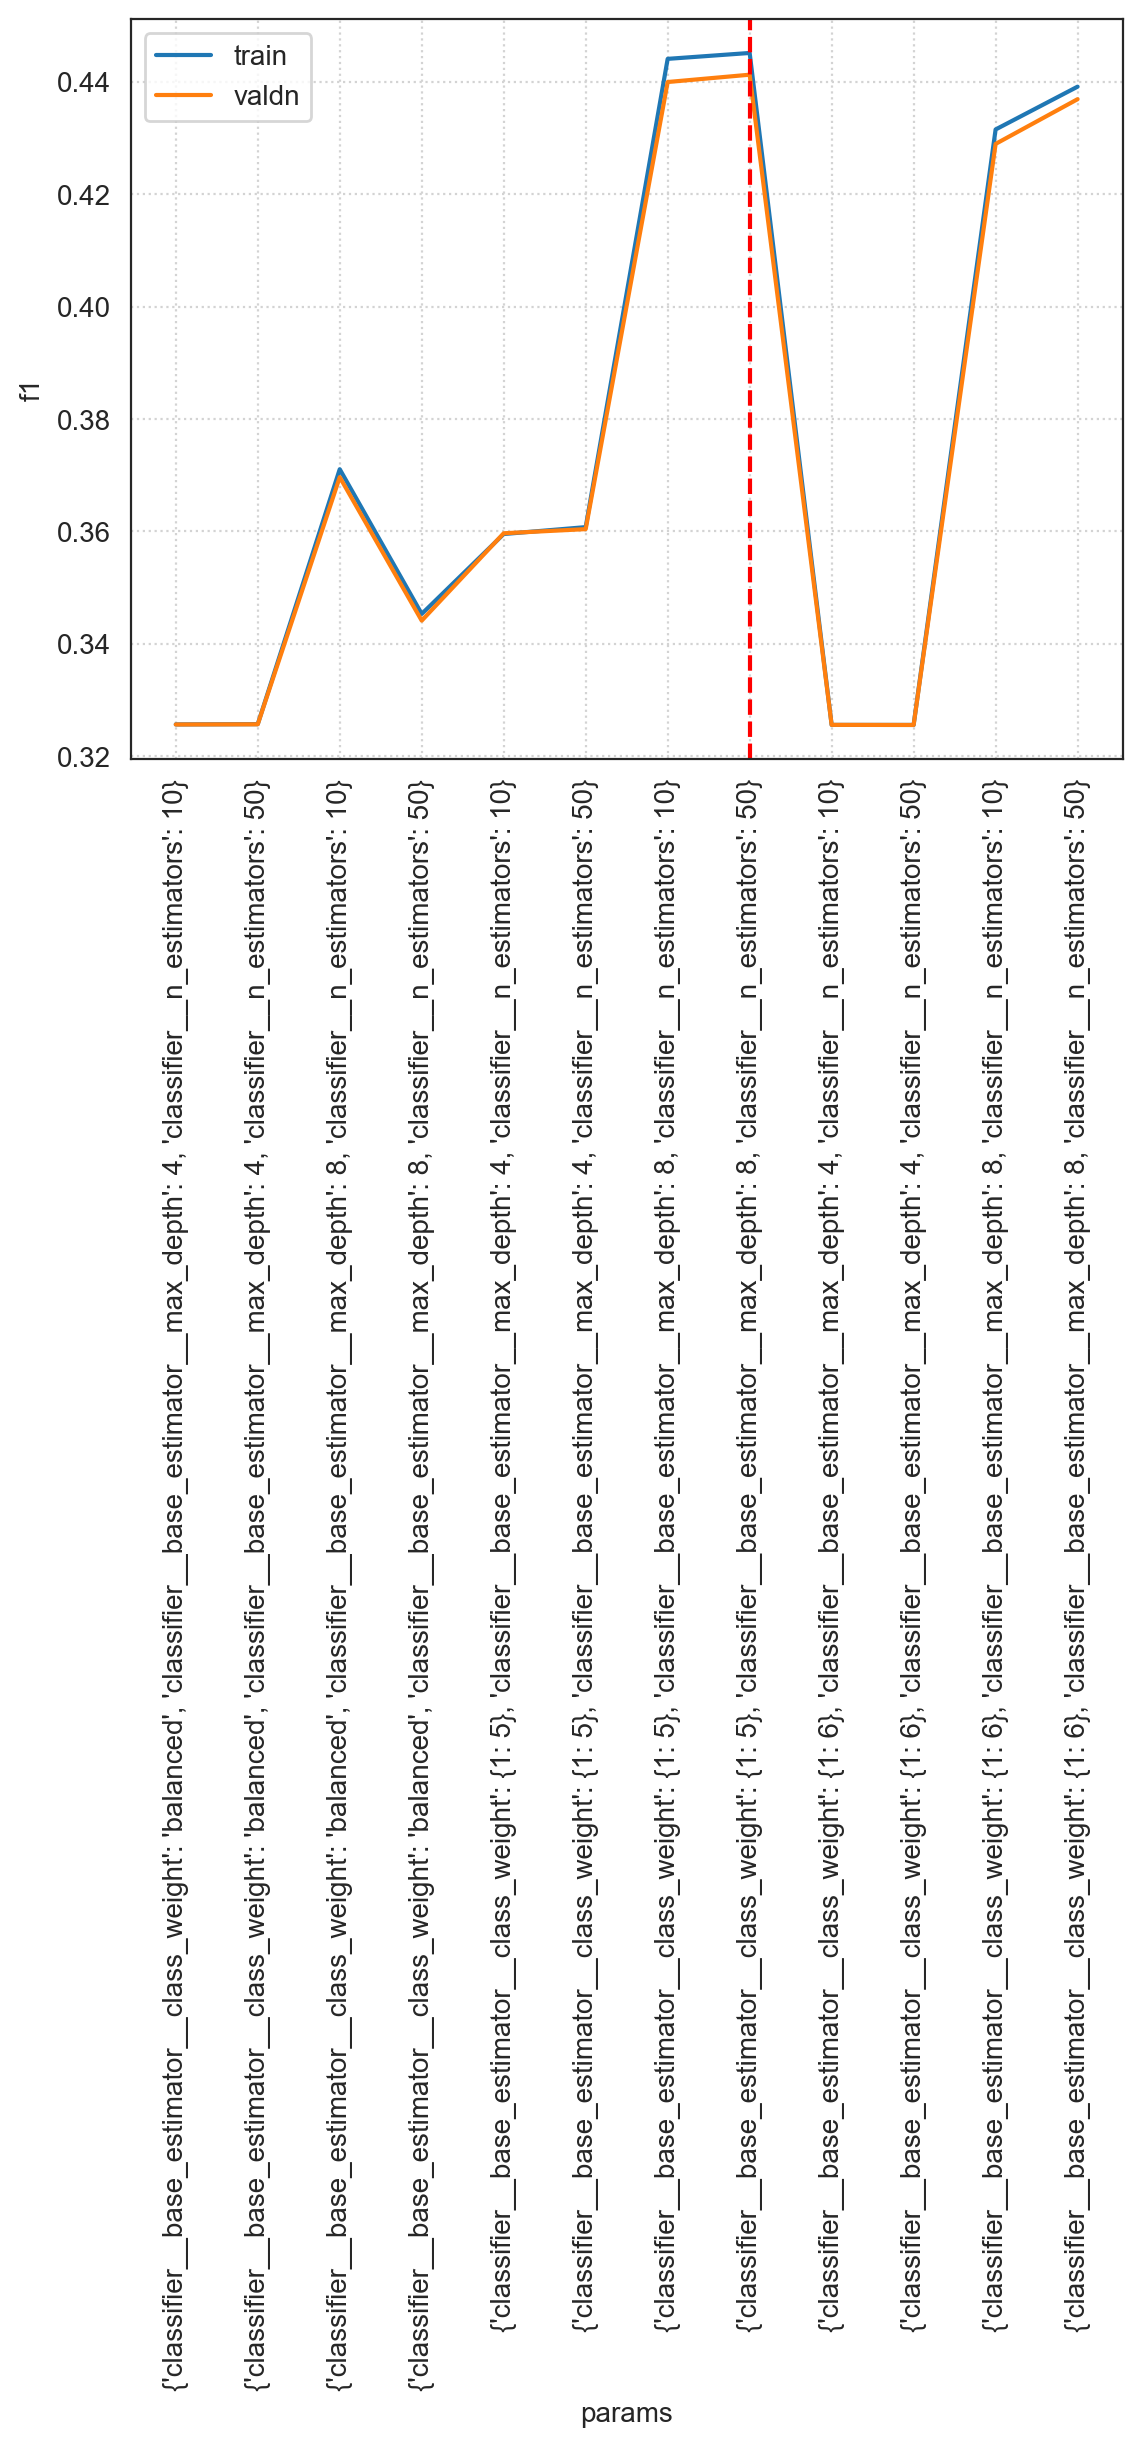

param                                                                  f1        \
   classifier__base_estimator__class_weight classifier__base_estimator__max_depth classifier__n_estimators test train   
0                                  balanced                                     4                       10 0.33  0.33   
1                                  balanced                                     4                       50 0.33  0.33   
2                                  balanced                                     8                       10 0.37  0.37   
3                                  balanced                                     8                       50 0.34  0.35   
4                                    {1: 5}                                     4                       10 0.36  0.36   
5                                    {1: 5}                                     4                       50 0.36  0.36   
6                                    {1: 5}                                     8                       10 0.44  0.44   
7                                    {1: 5}                                     8                       50 0.44  0.45   
8                                    {1: 6}                                     4                       10 0.33  0.33   
9                                    {1: 6}                                     4                       50 0.33  0.33   
10                                   {1: 6}                                     8                       10 0.43  0.43   
11                                   {1: 6}                                     8                       50 0.44  0.44   

   recall       precision       balanced_accuracy       accuracy       roc_auc        
     test train      test train              test train     test train    test train  
0    0.92  0.92       0.2   0.2              0.66  0.66     0.48  0.48    0.73  0.73  
1    0.92  0.92       0.2   0.2              0.66  0.66     0.48  0.48    0.73  0.73  
2     0.8  0.81      0.24  0.24               0.7   0.7     0.62  0.62    0.79  0.79  
3    0.89   0.9      0.21  0.21              0.68  0.69     0.53  0.53    0.79   0.8  
4    0.24  0.24      0.73  0.73              0.61  0.61     0.88  0.88    0.73  0.73  
5    0.25  0.25      0.67  0.67              0.61  0.61     0.88  0.88    0.73  0.73  
6    0.47  0.47      0.42  0.42              0.68  0.68     0.84  0.84    0.79  0.79  
7    0.47  0.48      0.41  0.42              0.68  0.69     0.84  0.84    0.79  0.79  
8    0.92  0.92       0.2   0.2              0.66  0.66     0.48  0.48    0.73  0.73  
9    0.92  0.92       0.2   0.2              0.66  0.66     0.48  0.48    0.73  0.73  
10   0.54  0.54      0.37  0.37              0.69  0.69      0.8   0.8    0.79  0.79  
11   0.53  0.53      0.37  0.38              0.69  0.69     0.81  0.81    0.79   0.8



Test_Set Results:
accuracy score:           0.84
f1 score:                 0.44
recall score:             0.46
precision score:          0.42
balanced_accuracy score:  0.68
roc_auc score:            0.68
              precision    recall  f1-score   support

           0       0.91      0.90      0.91    135913
           1       0.42      0.46      0.44     21773

    accuracy                           0.84    157686
   macro avg       0.67      0.68      0.67    157686
weighted avg       0.84      0.84      0.84    157686



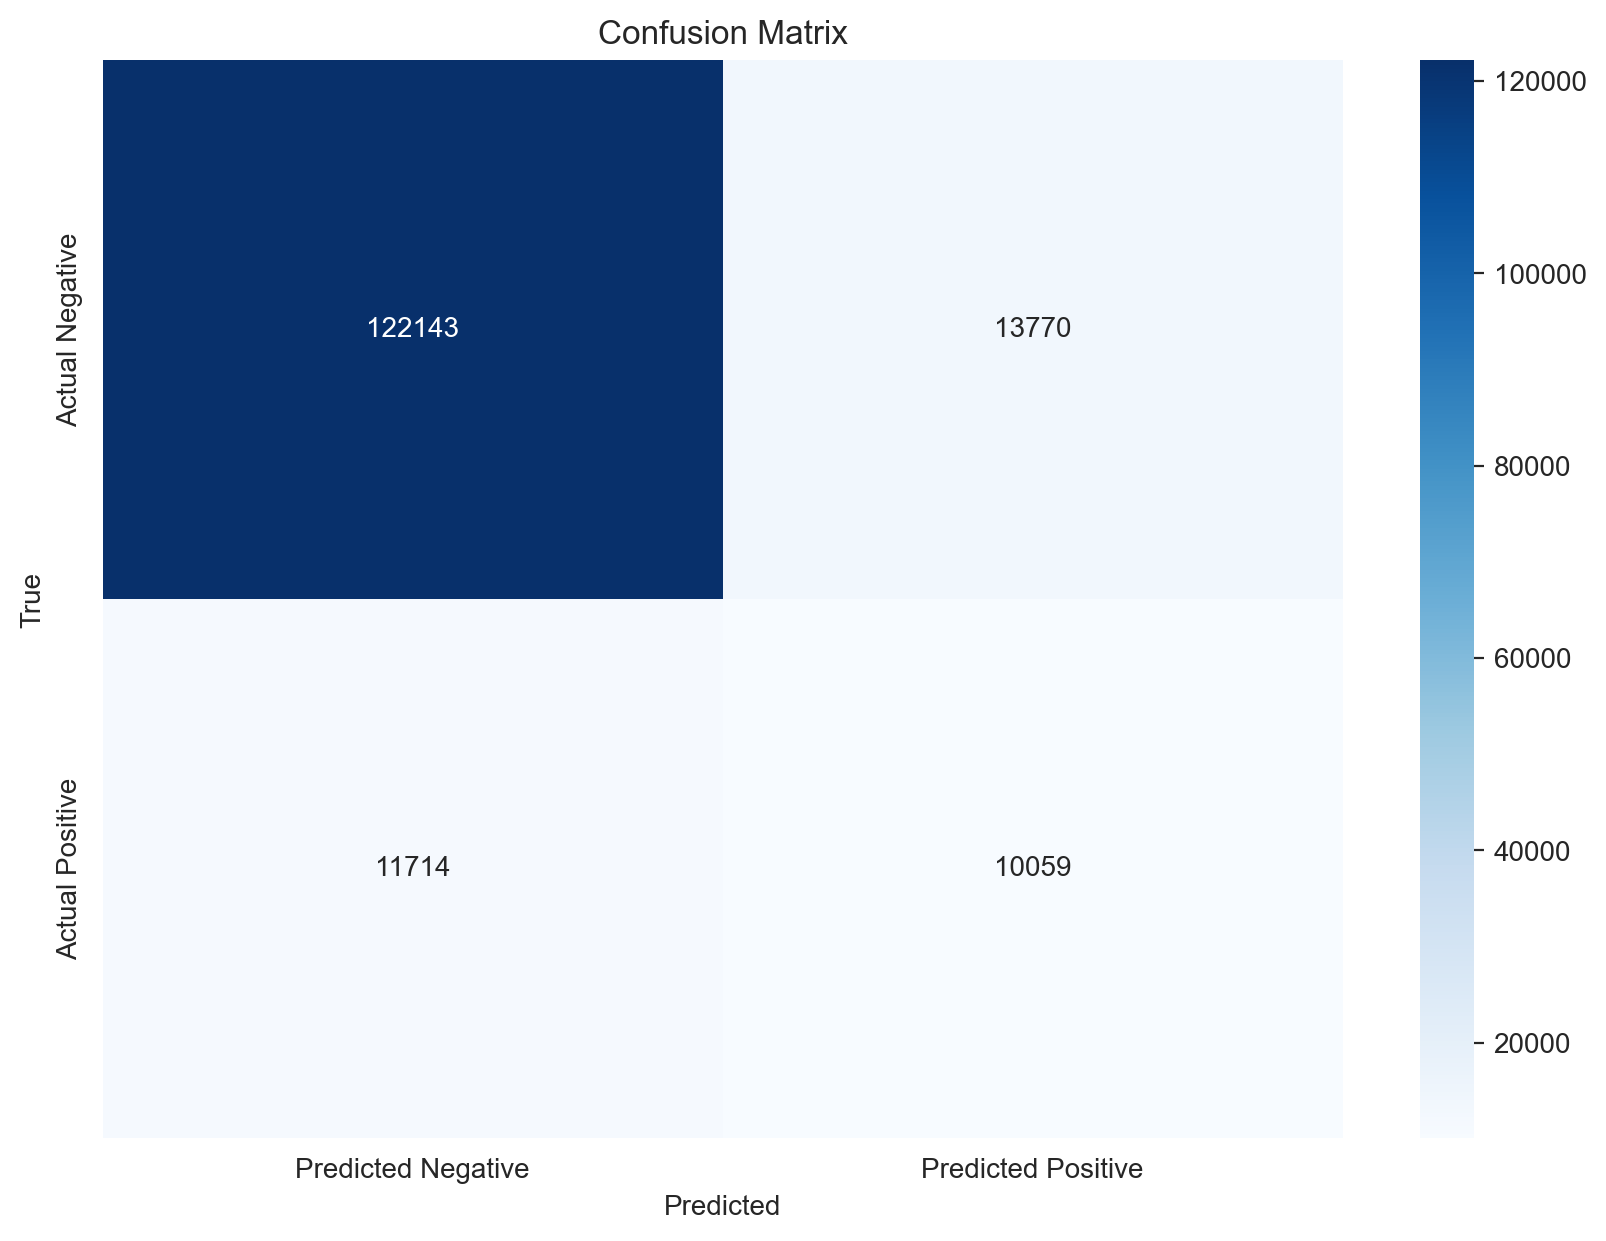

In [36]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=random_state))
    ]
)

params = {
    'classifier__base_estimator__class_weight': ['balanced',{1:5},{1:6}],
    'classifier__n_estimators': [10,50],
    'classifier__base_estimator__max_depth': [4, 8],
#    'classifier__max_samples': [.1],
#    'classifier__max_features': [.1,.3,.5,],
#    'classifier__min_samples_split': [.01,.05,.1,.2,.3],
#    'classifier__learning_rate': np.linspace(.1,1,3).round(2),
}
gs_bg = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_bg.fit(
    X_train,
    y_train
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_bg, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_bg, X_test, y_test)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\vanam\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(




Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                         max_depth=8),
                                   n_estimators=50, random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.74   0.74
	              recall   0.89   0.89
	           precision   0.63   0.63
	   balanced_accuracy   0.69   0.69
	            accuracy   0.69   0.69
	             roc_auc   0.79   0.79

Params:
	{'classifier__base_estimator__max_depth': 8, 'classifier__n_estimators': 50}



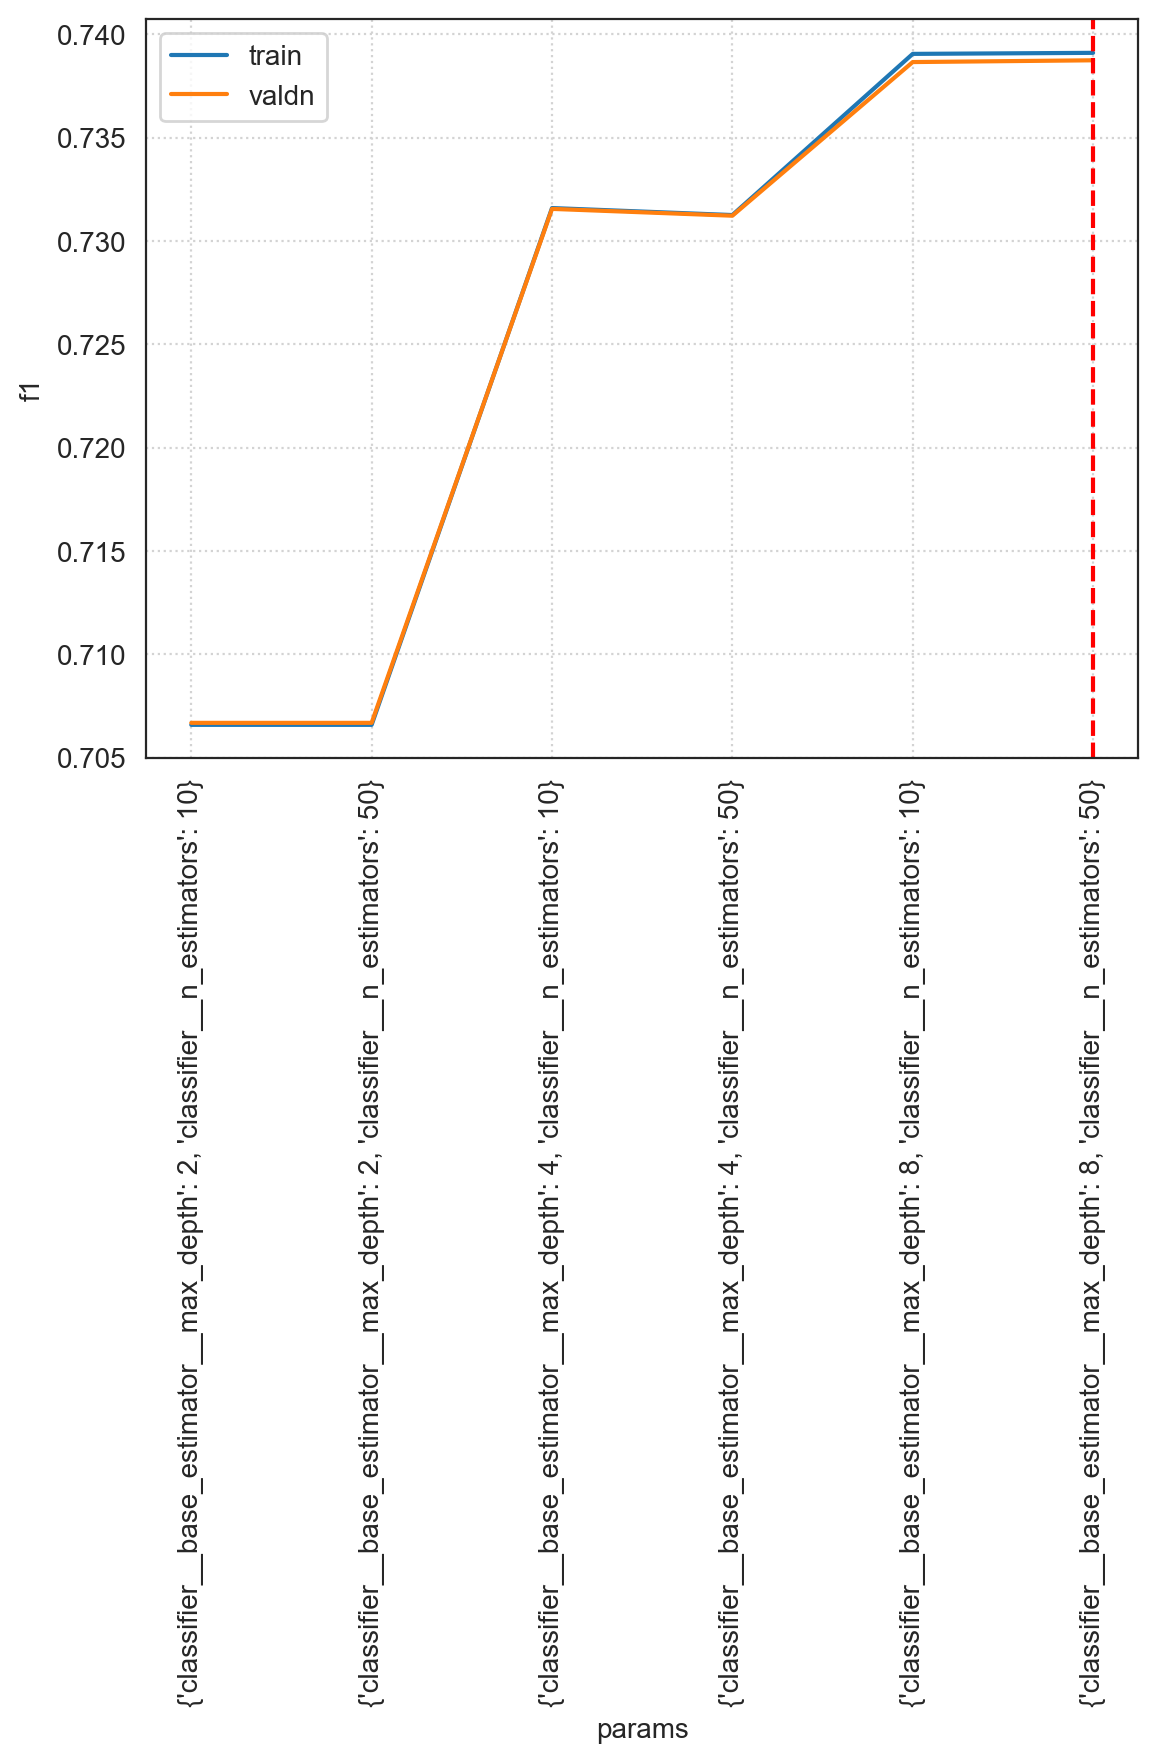

param                            f1       recall       precision        \
  classifier__base_estimator__max_depth classifier__n_estimators test train   test train      test train   
0                                     2                       10 0.71  0.71   0.96  0.96      0.56  0.56   
1                                     2                       50 0.71  0.71   0.96  0.96      0.56  0.56   
2                                     4                       10 0.73  0.73   0.92  0.92      0.61  0.61   
3                                     4                       50 0.73  0.73   0.92  0.92      0.61  0.61   
4                                     8                       10 0.74  0.74   0.89  0.89      0.63  0.63   
5                                     8                       50 0.74  0.74   0.89  0.89      0.63  0.63   

  balanced_accuracy       accuracy       roc_auc        
               test train     test train    test train  
0               0.6   0.6      0.6   0.6    0.66  0.66  
1               0.6   0.6      0.6   0.6    0.66  0.66  
2              0.66  0.66     0.66  0.66    0.73  0.73  
3              0.66  0.66     0.66  0.66    0.73  0.73  
4              0.69  0.69     0.69  0.69    0.79  0.79  
5              0.69  0.69     0.69  0.69    0.79  0.79



Test_Set Results:
accuracy score:           0.54
f1 score:                 0.35
recall score:             0.89
precision score:          0.22
balanced_accuracy score:  0.69
roc_auc score:            0.69
              precision    recall  f1-score   support

           0       0.96      0.49      0.65    135913
           1       0.22      0.89      0.35     21773

    accuracy                           0.54    157686
   macro avg       0.59      0.69      0.50    157686
weighted avg       0.86      0.54      0.60    157686



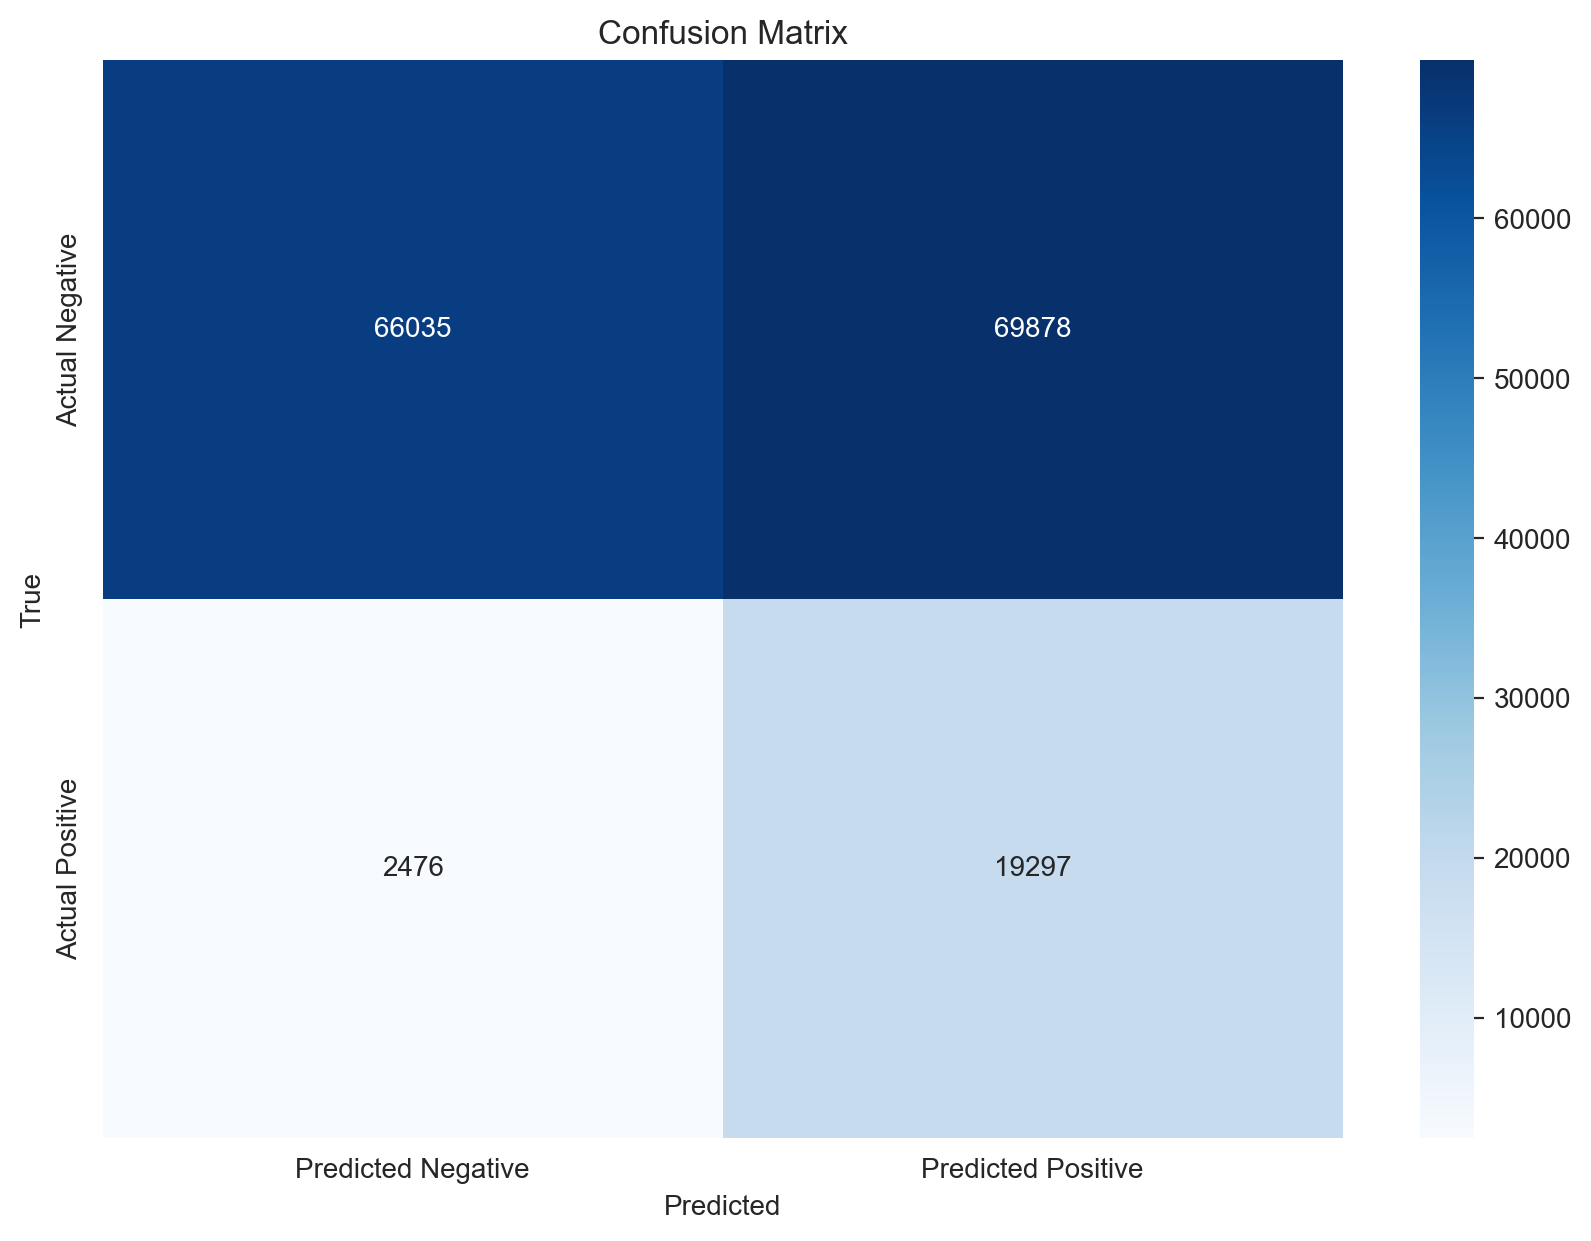

In [37]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=random_state))
    ]
)

params = {
    'classifier__n_estimators': [10,50],
    'classifier__base_estimator__max_depth': [2,4,8],
#    'classifier__max_samples': [.1],
#    'classifier__max_features': [.1,.3,.5,],|
#    'classifier__min_samples_split': [.01,.05,.1,.2,.3],
#    'classifier__learning_rate': np.linspace(.1,1,3).round(2),
}
gs_bg = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_bg.fit(
    X_train_resampled,
    y_train_resampled
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_bg, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_bg, X_test, y_test)
